### Project Description:
Product range analysis of on-line store

<a id='up'></a>
### Table of contents
1. [Opening data](#start)
2. [Prepare the data for analysis](#preprocessing)
    
3. [Study and check the data](#study) 
    
4. [KPI](#kpi)  
    
5.  [Product range analysis](#product) 
6.  [Product categories](#cat)
    
7.  [Testing hypotesis](#hypothesis)
8.  [ General conclusion](#general)

<a id='start'></a>
#### 1. Importing all necessary libraries and opening a dataset

In [2]:
import math
from scipy import stats as st
import pandas as pd
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
#!pip install -U textblob
from textblob import TextBlob

In [4]:
import nltk
from nltk.corpus import brown
!python -m textblob.download_corpora

Finished.


[nltk_data] Error loading brown: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading punkt: <urlopen error [WinError 10051] A
[nltk_data]     socket operation was attempted to an unreachable
[nltk_data]     network>
[nltk_data] Downloading package wordnet to C:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to C:\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to C:\nltk_data...
[nltk_data]   Package movie_reviews is already up-to

In [5]:
path = 'C:\\Users\\michaelm\\Documents\\Praktikum Data Analysis Yandex\\Projects\\Graduation Project\\'

In [6]:
data=pd.read_csv (path + r'ecommerce_dataset_us.csv', sep='\t')
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID  
0  11/29/2018 08:26       2.55     17850.0  
1  11/29/2018 08:26       3.39     17850.0  
2  11/29/2018 08:26       2.75     17850.0  
3  11/29/2018 08:26       3.39     17850.0  
4  11/29/2018 08:26       3.39     17850.0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


##### <a id='preprocessing'></a>
#### Preparing data for analysis:  

* changing column names to the lowercase
* changing data types for optimization:`invoicedate` to `datetime64`, `invoiceno, stockcode, description` to `category`. 
* add a separate column for dates
* check for missing values 
* check for duplicates


In [9]:
data.columns = map(str.lower, data.columns)
data.sample()

invoiceno stockcode        description  quantity       invoicedate  \
390460    570521     20963  APPLE BATH SPONGE        10  10/09/2019 10:43   

        unitprice  customerid  
390460       1.25     12371.0

In [10]:
data['invoiceno'] = data['invoiceno'].astype('category')
data['stockcode'] = data['stockcode'].astype('category')
data['description'] = data['description'].astype('category')
data['invoicedate'] = pd.to_datetime(data['invoicedate'])
data['date'] = data['invoicedate'].astype('datetime64[D]')
data.sample()

invoiceno stockcode            description  quantity  \
442386    574673     22547  MINI JIGSAW DINOSAUR          1   

               invoicedate  unitprice  customerid       date  
442386 2019-11-04 12:26:00       0.42     15555.0 2019-11-04

In [11]:
data.describe()

quantity      unitprice     customerid
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [12]:
#checking zero values in entire table
for i in data.columns:
    print(i, len(data[data[i]==0]))

invoiceno 0
stockcode 0
description 0
quantity 0
invoicedate 0
unitprice 2515
customerid 0
date 0


0 unitprice I'll consider as resending items to unsatsified customers/lost on the way/broken on the way packages

In [13]:
data[data.unitprice ==0]['description'].value_counts().sort_values(ascending=True).head(20)

CHILDRENS CUTLERY POLKADOT BLUE        0
WALL ART BICYCLE SAFTEY                0
WALL ART BICYCLE SAFETY                0
WALL ART ANIMALS AND NATURE            0
WALL ART 70'S ALPHABET                 0
WALL ART ,PUDDINGS                     0
WALL ART , THE MAGIC FOREST            0
WALL ART , LOVES' SECRET               0
WAKE UP COCKEREL TILE HOOK             0
WAKE UP COCKEREL TILE COASTER          0
WALL ART VINTAGE HEART                 0
WALL ART WORK REST AND PLAY            0
WALL ART,ONLY ONE PERSON               0
WALL MIRROR RECTANGLE DIAMANTE PINK    0
WHITE CHRISTMAS STAR DECORATION        0
WHITE CHRISTMAS GARLAND STARS TREES    0
WHITE CHRISTMAS FLOCK DROPLET          0
WHITE CHERRY LIGHTS                    0
WHITE CANDYSTUFT ARTIFICIAL FLOWER     0
WHITE BROCANTE SOAP DISH               0
Name: description, dtype: int64

In [14]:
data[data.unitprice ==0]['description'].value_counts().sort_values(ascending=False).head(20)

check                              159
?                                   47
damages                             45
damaged                             43
found                               25
sold as set on dotcom               20
adjustment                          16
Damaged                             14
thrown away                          9
FRENCH BLUE METAL DOOR SIGN 1        9
Unsaleable, destroyed.               9
FRENCH BLUE METAL DOOR SIGN 8        8
Found                                8
amazon                               8
FRENCH BLUE METAL DOOR SIGN 4        7
RECIPE BOX PANTRY YELLOW DESIGN      7
FRENCH BLUE METAL DOOR SIGN 3        7
??                                   7
Amazon                               7
FRENCH BLUE METAL DOOR SIGN No       7
Name: description, dtype: int64

In [15]:
data.query('unitprice ==0').groupby('description').count().reset_index().tail(5)

description  invoiceno  stockcode  quantity  \
4218   wrongly marked carton 22804          1          1         1   
4219  wrongly marked. 23343 in box          1          1         1   
4220  wrongly sold (22719) barcode          1          1         1   
4221          wrongly sold as sets          1          1         1   
4222             wrongly sold sets          1          1         1   

      invoicedate  unitprice  customerid  date  
4218            1          1           0     1  
4219            1          1           0     1  
4220            1          1           0     1  
4221            1          1           0     1  
4222            1          1           0     1

I still stick to my theory about those products, also during the minority and quatities they have low impact to general calculations

In [16]:
categorical = data.dtypes[data.dtypes == "category"].index
data[categorical].describe()

invoiceno stockcode                         description
count     541909    541909                              540455
unique     25900      4070                                4223
top       573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER
freq        1114      2313                                2369

In [17]:
data.duplicated().sum()

5268

In [18]:
data[data.duplicated()].head(10)

invoiceno stockcode                        description  quantity  \
517    536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527    536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537    536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539    536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555    536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
587    536412     22273               FELTCRAFT DOLL MOLLY         1   
589    536412     22749  FELTCRAFT PRINCESS CHARLOTTE DOLL         1   
594    536412     22141     CHRISTMAS CRAFT TREE TOP ANGEL         1   
598    536412     21448          12 DAISY PEGS IN WOOD BOX         1   
600    536412     22569        FELTCRAFT CUSHION BUTTERFLY         2   

            invoicedate  unitprice  customerid       date  
517 2018-11-29 11:45:00       1.25     17908.0 2018-11-29  
527 2018-11-29 11:45:00       2.10     17908.0 2018-11-29  
537 2018-11-29 11:45:00       2.95     17908.0 2018-11-29  
539 2018-11-29 11:45:00       4.95     17908.0 2018-11-29  
555 2018-11-29 11:49:00       2.95     17920.0 2018-11-29  
587 2018-11-29 11:49:00       2.95     17920.0 2018-11-29  
589 2018-11-29 11:49:00       3.75     17920.0 2018-11-29  
594 2018-11-29 11:49:00       2.10     17920.0 2018-11-29  
598 2018-11-29 11:49:00       1.65     17920.0 2018-11-29  
600 2018-11-29 11:49:00       3.75     17920.0 2018-11-29

In [19]:
for i in data[data.duplicated()].columns:
    print(i,':',data[data.duplicated()][i].nunique())

invoiceno : 1933
stockcode : 1706
description : 1732
quantity : 35
invoicedate : 1914
unitprice : 80
customerid : 960
date : 298


it looks like a duplicates here are  glitch and appended by a system

In [20]:
data = data.drop_duplicates().reset_index(drop=True)

In [21]:
data.isna().sum()

invoiceno           0
stockcode           0
description      1454
quantity            0
invoicedate         0
unitprice           0
customerid     135037
date                0
dtype: int64

In [22]:
data_for_null=data.copy()

In [23]:
data_for_null1 = data_for_null.query('unitprice == "0"')
data_for_null1.head()

invoiceno stockcode description  quantity         invoicedate  unitprice  \
605     536414     22139         NaN        56 2018-11-29 11:52:00        0.0   
1934    536545     21134         NaN         1 2018-11-29 14:32:00        0.0   
1935    536546     22145         NaN         1 2018-11-29 14:33:00        0.0   
1936    536547     37509         NaN         1 2018-11-29 14:33:00        0.0   
1951    536549    85226A         NaN         1 2018-11-29 14:34:00        0.0   

      customerid       date  
605          NaN 2018-11-29  
1934         NaN 2018-11-29  
1935         NaN 2018-11-29  
1936         NaN 2018-11-29  
1951         NaN 2018-11-29

In [24]:
nulls = data_for_null.query('description == "NaN"').pivot_table(index='stockcode',values='invoiceno',aggfunc=['count'])
nulls.head()

count
          invoiceno
stockcode          
10002             0
10080             0
10120             0
10123C            0
10123G            0

In [25]:
data.dropna(subset=['description'], inplace=True)

In [26]:
data.isna().sum()

invoiceno           0
stockcode           0
description         0
quantity            0
invoicedate         0
unitprice           0
customerid     133583
date                0
dtype: int64

After inspecting `description` NaN rows I've noticed that they have 0 unit price and 0 invoice number, so i've decided to drop them.

In [27]:
nulls2 = data_for_null.query('customerid == "NaN"').pivot_table(index='stockcode',values='invoiceno',aggfunc=['count'])
nulls2.head()

count
          invoiceno
stockcode          
10002            24
10080             3
10120             0
10123C            1
10123G            1

In [28]:
data_for_null2 = data_for_null.query('customerid == "NaN"')
data_for_null2.head(10)

invoiceno stockcode                          description  quantity  \
605     536414     22139                                  NaN        56   
1407    536544     21773      DECORATIVE ROSE BATHROOM BOTTLE         1   
1408    536544     21774      DECORATIVE CATS BATHROOM BOTTLE         2   
1409    536544     21786                   POLKADOT RAIN HAT          4   
1410    536544     21787                RAIN PONCHO RETROSPOT         2   
1411    536544     21790                   VINTAGE SNAP CARDS         9   
1412    536544     21791   VINTAGE HEADS AND TAILS CARD GAME          2   
1413    536544     21801  CHRISTMAS TREE DECORATION WITH BELL        10   
1414    536544     21802      CHRISTMAS TREE HEART DECORATION         9   
1415    536544     21803       CHRISTMAS TREE STAR DECORATION        11   

             invoicedate  unitprice  customerid       date  
605  2018-11-29 11:52:00       0.00         NaN 2018-11-29  
1407 2018-11-29 14:32:00       2.51         NaN 2018-11-29  
1408 2018-11-29 14:32:00       2.51         NaN 2018-11-29  
1409 2018-11-29 14:32:00       0.85         NaN 2018-11-29  
1410 2018-11-29 14:32:00       1.66         NaN 2018-11-29  
1411 2018-11-29 14:32:00       1.66         NaN 2018-11-29  
1412 2018-11-29 14:32:00       2.51         NaN 2018-11-29  
1413 2018-11-29 14:32:00       0.43         NaN 2018-11-29  
1414 2018-11-29 14:32:00       0.43         NaN 2018-11-29  
1415 2018-11-29 14:32:00       0.43         NaN 2018-11-29

In [29]:
data_for_null2.invoiceno.value_counts()

573585    1114
581219     749
581492     731
580729     721
558475     705
          ... 
571205       0
571212       0
571213       0
571214       0
536365       0
Name: invoiceno, Length: 25900, dtype: int64

In [30]:
data_for_null2.invoicedate.value_counts()

2019-10-29 14:41:00    1114
2019-12-06 09:28:00     749
2019-12-07 10:03:00     731
2019-12-03 17:24:00     721
2019-06-27 15:58:00     705
                       ... 
2019-04-09 13:50:00       1
2019-05-07 16:48:00       1
2019-03-30 11:53:00       1
2019-03-16 14:40:00       1
2019-05-14 13:47:00       1
Name: invoicedate, Length: 3161, dtype: int64

In [31]:
data.dropna(subset=['customerid'], inplace=True)

In [32]:
data.isna().sum()

invoiceno      0
stockcode      0
description    0
quantity       0
invoicedate    0
unitprice      0
customerid     0
date           0
dtype: int64

After inspecting empty values in `customerid` I didn't find any pattern how to restore them, so i'll drop them too

In [33]:
data = data.query('quantity >0')
data.head()

invoiceno stockcode                          description  quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          invoicedate  unitprice  customerid       date  
0 2018-11-29 08:26:00       2.55     17850.0 2018-11-29  
1 2018-11-29 08:26:00       3.39     17850.0 2018-11-29  
2 2018-11-29 08:26:00       2.75     17850.0 2018-11-29  
3 2018-11-29 08:26:00       3.39     17850.0 2018-11-29  
4 2018-11-29 08:26:00       3.39     17850.0 2018-11-29

Filtered out negative quantities

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 536640
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    392732 non-null  category      
 1   stockcode    392732 non-null  category      
 2   description  392732 non-null  category      
 3   quantity     392732 non-null  int64         
 4   invoicedate  392732 non-null  datetime64[ns]
 5   unitprice    392732 non-null  float64       
 6   customerid   392732 non-null  float64       
 7   date         392732 non-null  datetime64[ns]
dtypes: category(3), datetime64[ns](2), float64(2), int64(1)
memory usage: 22.0 MB


[Back to top🔝](#up)

<a id='study'></a>
#### Study and check the data:
* check how many customers (unique) are in the logs
* check how many purchases are in the logs
* calculate the average number of purchases per customer
* check period of time does the data covers and evaluate by barplot/hystogram the complete periode



In [35]:
print('There are',data.description.nunique(), 'products in the store')

There are 3877 products in the store


In [36]:
customers = data.customerid.nunique()
print('There are', customers, 'customers in the logs')

There are 4339 customers in the logs


In [37]:
purchases = data.invoiceno.nunique()
print(purchases, 'purchases were made')

18536 purchases were made


In [38]:
items = data.invoiceno.count()
print(items, 'items were sold')

392732 items were sold


In [39]:
avg_items_customer = items/customers
print('The average number of items per user is',avg_items_customer.round())

The average number of items per user is 91.0


In [40]:
avg_order_per_customer=(purchases/customers)
print('Average orders per customer is',avg_order_per_customer)

Average orders per customer is 4.271952062687255


In [41]:
data.invoicedate.min()

Timestamp('2018-11-29 08:26:00')

In [42]:
data.invoicedate.max()

Timestamp('2019-12-07 12:50:00')

In [43]:
periode = data.pivot_table(index = ['invoicedate'], values = 'customerid', aggfunc = ({'count'})).reset_index()
periode.columns = ['date', 'count']
periode.head()

date  count
0 2018-11-29 08:26:00      7
1 2018-11-29 08:28:00      2
2 2018-11-29 08:34:00     16
3 2018-11-29 08:35:00      1
4 2018-11-29 08:45:00     20

In [44]:
fig = px.line(periode, x='date', y='count', title='Time periode')
fig.show() 

Data covers complete equaly periode between 29/11/2018 - 07/12/2019. Can be seen more activity during pre-winter hollydays.

[Back to top🔝](#up)

<a id='kpi'></a>
#### KPI
* add `day, week, month` columns
* calculate DAU/WAU/MAU
* calculate sticky factor
* calculate daily/weekly/monthly revenue
* calculate average revenue per user (ARPPU)
* calculate how often users come back - retention rate and present a heatmap by cohorts
* calculate average purchase size and present heatmap by cohorts
* calculate LTV and present heatmap by cohorts


In [45]:
data['order_year']  = data['invoicedate'].dt.year
data['order_month'] = data['invoicedate'].dt.month
data['order_week']  = data['invoicedate'].dt.week
data['order_date'] = data['invoicedate'].dt.date

In [46]:
data.sample()

invoiceno stockcode                        description  quantity  \
272839    560930     22402  MAGNETS PACK OF 4 VINTAGE COLLAGE        12   

               invoicedate  unitprice  customerid       date  order_year  \
272839 2019-07-20 10:23:00       0.39     15829.0 2019-07-20        2019   

        order_month  order_week  order_date  
272839            7          29  2019-07-20

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 536640
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    392732 non-null  category      
 1   stockcode    392732 non-null  category      
 2   description  392732 non-null  category      
 3   quantity     392732 non-null  int64         
 4   invoicedate  392732 non-null  datetime64[ns]
 5   unitprice    392732 non-null  float64       
 6   customerid   392732 non-null  float64       
 7   date         392732 non-null  datetime64[ns]
 8   order_year   392732 non-null  int64         
 9   order_month  392732 non-null  int64         
 10  order_week   392732 non-null  int64         
 11  order_date   392732 non-null  object        
dtypes: category(3), datetime64[ns](2), float64(2), int64(4), object(1)
memory usage: 44.0+ MB


In [48]:
data['order_date'] = pd.to_datetime(data['order_date'])

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 536640
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    392732 non-null  category      
 1   stockcode    392732 non-null  category      
 2   description  392732 non-null  category      
 3   quantity     392732 non-null  int64         
 4   invoicedate  392732 non-null  datetime64[ns]
 5   unitprice    392732 non-null  float64       
 6   customerid   392732 non-null  float64       
 7   date         392732 non-null  datetime64[ns]
 8   order_year   392732 non-null  int64         
 9   order_month  392732 non-null  int64         
 10  order_week   392732 non-null  int64         
 11  order_date   392732 non-null  datetime64[ns]
dtypes: category(3), datetime64[ns](3), float64(2), int64(4)
memory usage: 44.0 MB


In [50]:
mau_total = data.groupby(['order_year', 'order_month']).agg({'customerid': 'nunique'}).mean().round()
dau_total = data.groupby('order_date').agg({'customerid': 'nunique'}).mean().round()
wau_total = data.groupby(['order_year', 'order_week']).agg({'customerid': 'nunique'}).mean().round()

In [51]:
print('DAU is',int(dau_total))
print('WAU is',int(wau_total))
print('MAU is',int(mau_total))

DAU is 55
WAU is 300
MAU is 932


Calculated how many people use product every day, week, and month using DAU, WAU, MAU respectively. Generally, these metrics increase steadily.

In [52]:
sticky_mau = int((dau_total/wau_total)*100)
sticky_wau = int((dau_total/mau_total)*100)

In [53]:
print('Sticky factor expressed as the ratio between the monthly and weekly audience: ')
print('Sticky WAU is',sticky_wau,'%')
print('Sticky MAU is',sticky_mau,'%')


Sticky factor expressed as the ratio between the monthly and weekly audience: 
Sticky WAU is 5 %
Sticky MAU is 18 %


In [54]:
orders_per_customer = data.groupby(['date']).agg({'customerid': ['count','nunique']})
orders_per_customer.columns = ['day_orders', 'n_users']
orders_per_customer['orders_per_customer'] = orders_per_customer['day_orders'] / orders_per_customer['n_users']
orders_per_customer.reset_index()

date  day_orders  n_users  orders_per_customer
0   2018-11-29        1898       95            19.978947
1   2018-11-30        1959       99            19.787879
2   2018-12-01        1086       50            21.720000
3   2018-12-03        2603       75            34.706667
4   2018-12-04        1897       82            23.134146
..         ...         ...      ...                  ...
300 2019-12-03        3335      105            31.761905
301 2019-12-04        2503      103            24.300971
302 2019-12-05        2135       94            22.712766
303 2019-12-06        2499      105            23.800000
304 2019-12-07         610       35            17.428571

[305 rows x 4 columns]

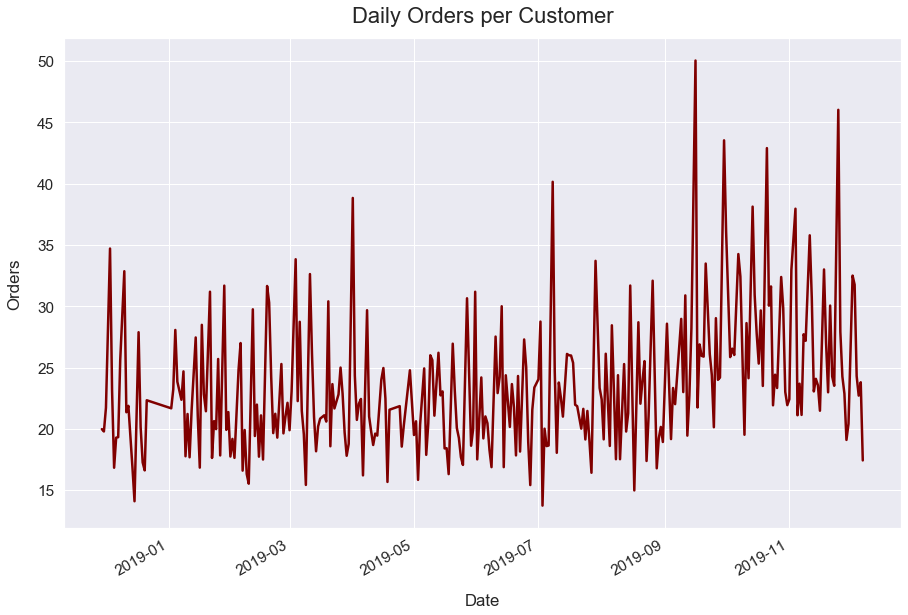

In [55]:
sns.set(font_scale=1.4)
orders_per_customer['orders_per_customer'].plot(figsize=(15, 10),kind='line', linewidth=2.5, color='maroon')
#orders_per_customer['n_users'].plot(figsize=(17, 10),kind='line', linewidth=2.5, color='b')
plt.xlabel("Date", labelpad=15)
plt.ylabel("Orders", labelpad=15)
plt.title("Daily Orders per Customer", y=1.02, fontsize=22);


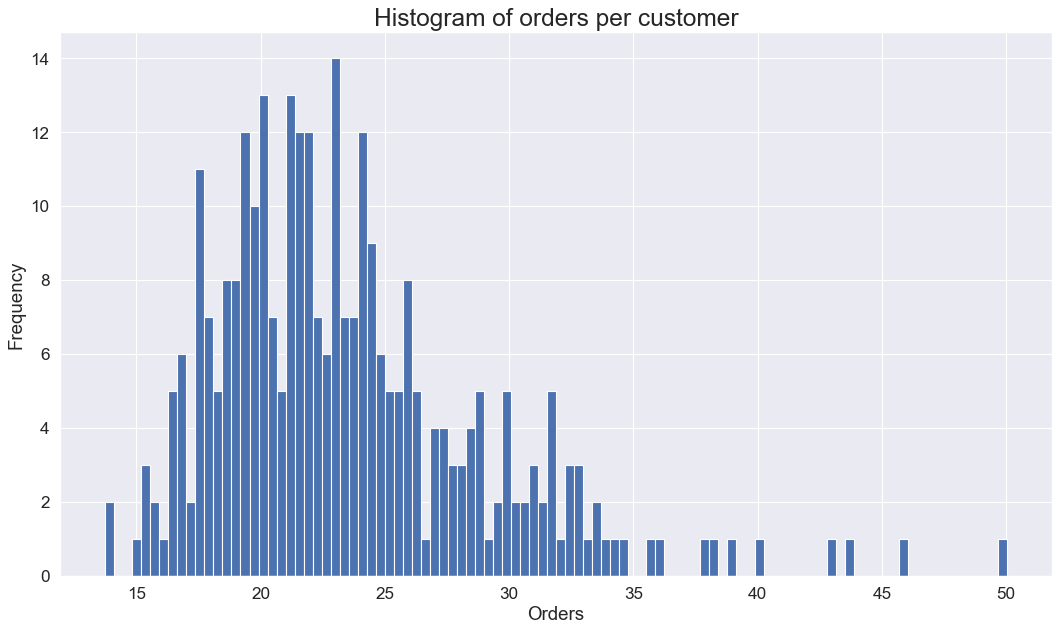

In [56]:
plt.figure(figsize=(16,9), dpi= 80)
orders_per_customer['orders_per_customer'].hist(bins=100)
plt.title('Histogram of orders per customer' , fontsize=22)
plt.xlabel('Orders')
plt.ylabel("Frequency")
plt.show()

In [57]:
print('There are average', orders_per_customer['orders_per_customer'].mean(), 'orders per customer')

There are average 23.532197479284566 orders per customer


In [58]:
print('There are',orders_per_customer['n_users'].mean(), 'customers at average per day')

There are 54.97049180327869 customers at average per day



Checking if  DAU/MAU/WAU change over time? Can we check that?
   

In [59]:
dau_qtr1 = data.query('"2018-11-29" <= order_date < "2019-03-01"').groupby('order_date').agg({'customerid': 'nunique'}).mean()
dau_qtr1

customerid    45.528571
dtype: float64

In [60]:
dau_qtr2 = data.query('"2019-03-01" <= order_date < "2019-06-01"').groupby('order_date').agg({'customerid': 'nunique'}).mean()
dau_qtr2

customerid    49.369863
dtype: float64

In [61]:
dau_qtr3 = data.query('"2019-06-01" <= order_date < "2019-09-01"').groupby('order_date').agg({'customerid': 'nunique'}).mean()
dau_qtr3

customerid    47.487179
dtype: float64

In [62]:
dau_qtr4 = data.query('order_date > "2019-09-01"').groupby('order_date').agg({'customerid': 'nunique'}).mean()
dau_qtr4

customerid    74.654762
dtype: float64

In [63]:
mau_qtr1 = data.query('"2018-11-29" <= order_date < "2019-03-01"').groupby(['order_year', 'order_month']).agg({'customerid': 'nunique'}).mean().round()
mau_qtr1

customerid    628.0
dtype: float64

In [64]:
mau_qtr2 = data.query('"2019-03-01" <= order_date < "2019-06-01"').groupby(['order_year', 'order_month']).agg({'customerid': 'nunique'}).mean().round()
mau_qtr2

customerid    953.0
dtype: float64

In [65]:
mau_qtr3 = data.query('"2019-06-01" <= order_date < "2019-09-01"').groupby(['order_year', 'order_month']).agg({'customerid': 'nunique'}).mean().round()
mau_qtr3

customerid    962.0
dtype: float64

In [66]:
mau_qtr4 = data.query('order_date > "2019-09-01"').groupby(['order_year', 'order_month']).agg({'customerid': 'nunique'}).mean().round()
mau_qtr4

customerid    1198.0
dtype: float64

DAU is growing during the time periode, there is minor decrease in summer but it jumps after that. On the other hand, MAU is steadily increase over the time.

[Back to top🔝](#up)

#### Revenues , LTV, Retention

In [67]:
data.sample()

invoiceno stockcode                    description  quantity  \
80603    543124     84378  SET OF 3 HEART COOKIE CUTTERS         4   

              invoicedate  unitprice  customerid       date  order_year  \
80603 2019-02-01 14:15:00       1.25     15311.0 2019-02-01        2019   

       order_month  order_week order_date  
80603            2           5 2019-02-01

In [68]:
data['revenue'] = data['unitprice']*data['quantity']
data.head()

invoiceno stockcode                          description  quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          invoicedate  unitprice  customerid       date  order_year  \
0 2018-11-29 08:26:00       2.55     17850.0 2018-11-29        2018   
1 2018-11-29 08:26:00       3.39     17850.0 2018-11-29        2018   
2 2018-11-29 08:26:00       2.75     17850.0 2018-11-29        2018   
3 2018-11-29 08:26:00       3.39     17850.0 2018-11-29        2018   
4 2018-11-29 08:26:00       3.39     17850.0 2018-11-29        2018   

   order_month  order_week order_date  revenue  
0           11          48 2018-11-29    15.30  
1           11          48 2018-11-29    20.34  
2           11          48 2018-11-29    22.00  
3           11          48 2018-11-29    20.34  
4           11          48 2018-11-29    20.34

In [69]:
print('The highest purchase is:' ,data['revenue'].max())
print('The average purchase is:' ,data['revenue'].mean())
print('The median purchase is:' ,data['revenue'].median())


The highest purchase is: 168469.6
The average purchase is: 22.629194702757022
The median purchase is: 12.39


In [70]:
max_purch = data.groupby(['description']).agg({'revenue': 'sum'})
max_purch.sort_values(by='revenue',ascending=False).head()

revenue
description                                  
PAPER CRAFT , LITTLE BIRDIE         168469.60
REGENCY CAKESTAND 3 TIER            142264.75
WHITE HANGING HEART T-LIGHT HOLDER  100392.10
JUMBO BAG RED RETROSPOT              85040.54
MEDIUM CERAMIC TOP STORAGE JAR       81416.73

In [71]:
monthly_revenue = data.groupby(['order_year', 'order_month']).agg({'revenue': 'sum'})
monthly_revenue.reset_index()

order_year  order_month      revenue
0         2018           11    93390.060
1         2018           12   477032.670
2         2019            1   611551.160
3         2019            2   444922.800
4         2019            3   576281.930
5         2019            4   450844.541
6         2019            5   713856.340
7         2019            6   628733.190
8         2019            7   626866.581
9         2019            8   671563.400
10        2019            9   894607.702
11        2019           10  1091768.470
12        2019           11  1177531.080
13        2019           12   428258.970

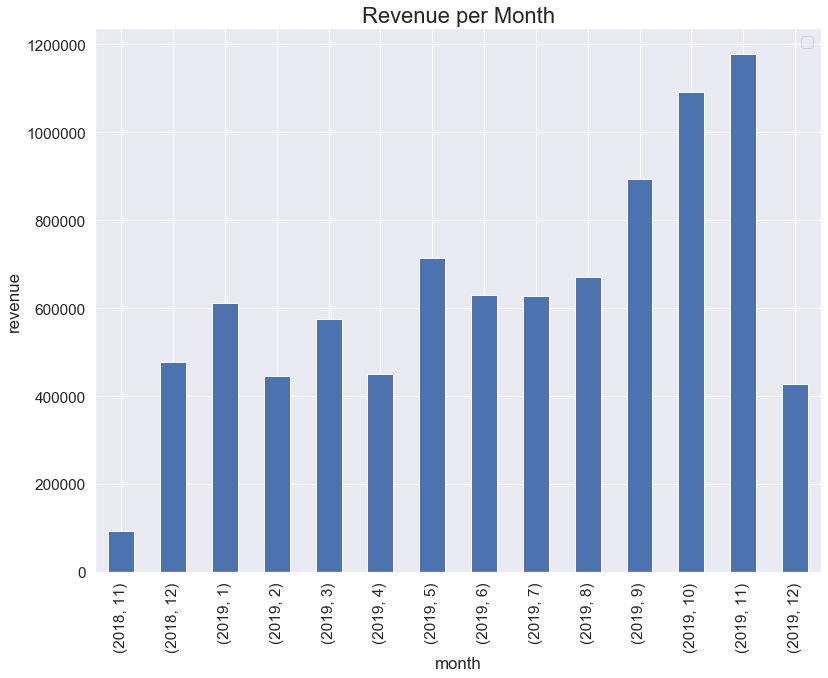

In [72]:
df_monthly_revenue = monthly_revenue[[ 'revenue']].sort_values(by='order_year',ascending=True)
df_monthly_revenue.plot.bar(figsize=(13,10))
plt.title('Revenue per Month' , fontsize=22)
plt.legend('')
plt.xlabel('month')
plt.ylabel("revenue")
plt.show()

The highest revenue has been spoted in October - November 2019

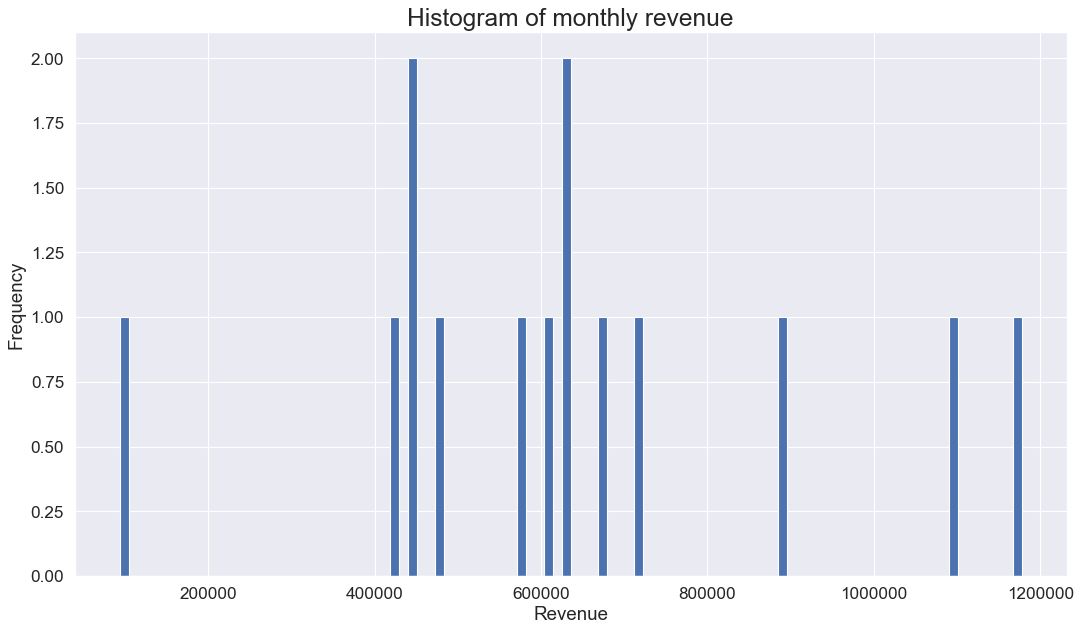

In [73]:
plt.figure(figsize=(16,9), dpi= 80)
monthly_revenue['revenue'].hist(bins=100)
plt.title('Histogram of monthly revenue' , fontsize=22)
plt.xlabel('Revenue')
plt.ylabel("Frequency")
plt.show()

I can say that the distribution of monthly revenue is closed to normal, although it has some sqew to the right.

In [74]:
first_order_date = data.groupby(['customerid'])['invoicedate'].min()
first_order_date.name = 'first_order_date'
orders = data.join(first_order_date,on='customerid')
orders.head()

invoiceno stockcode                          description  quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          invoicedate  unitprice  customerid       date  order_year  \
0 2018-11-29 08:26:00       2.55     17850.0 2018-11-29        2018   
1 2018-11-29 08:26:00       3.39     17850.0 2018-11-29        2018   
2 2018-11-29 08:26:00       2.75     17850.0 2018-11-29        2018   
3 2018-11-29 08:26:00       3.39     17850.0 2018-11-29        2018   
4 2018-11-29 08:26:00       3.39     17850.0 2018-11-29        2018   

   order_month  order_week order_date  revenue    first_order_date  
0           11          48 2018-11-29    15.30 2018-11-29 08:26:00  
1           11          48 2018-11-29    20.34 2018-11-29 08:26:00  
2           11          48 2018-11-29    22.00 2018-11-29 08:26:00  
3           11          48 2018-11-29    20.34 2018-11-29 08:26:00  
4           11          48 2018-11-29    20.34 2018-11-29 08:26:00

In [75]:
orders['order_month'] = orders['order_date'].astype('datetime64[M]')
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders.head()

invoiceno stockcode                          description  quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          invoicedate  unitprice  customerid       date  order_year  \
0 2018-11-29 08:26:00       2.55     17850.0 2018-11-29        2018   
1 2018-11-29 08:26:00       3.39     17850.0 2018-11-29        2018   
2 2018-11-29 08:26:00       2.75     17850.0 2018-11-29        2018   
3 2018-11-29 08:26:00       3.39     17850.0 2018-11-29        2018   
4 2018-11-29 08:26:00       3.39     17850.0 2018-11-29        2018   

  order_month  order_week order_date  revenue    first_order_date  \
0  2018-11-01          48 2018-11-29    15.30 2018-11-29 08:26:00   
1  2018-11-01          48 2018-11-29    20.34 2018-11-29 08:26:00   
2  2018-11-01          48 2018-11-29    22.00 2018-11-29 08:26:00   
3  2018-11-01          48 2018-11-29    20.34 2018-11-29 08:26:00   
4  2018-11-01          48 2018-11-29    20.34 2018-11-29 08:26:00   

  first_order_month  
0        2018-11-01  
1        2018-11-01  
2        2018-11-01  
3        2018-11-01  
4        2018-11-01

In [76]:
purchase_pivot=orders.pivot_table(index='first_order_month',columns='order_month',values='revenue',aggfunc='mean')
purchase_pivot.fillna('')

order_month       2018-11-01 2018-12-01 2019-01-01 2019-02-01 2019-03-01  \
first_order_month                                                          
2018-11-01           24.2131    29.7266    26.6611    26.2991    28.0436   
2018-12-01                      20.6745     27.162    26.8769    26.6393   
2019-01-01                                 25.7827    25.1104    21.7269   
2019-02-01                                            18.4263    21.3794   
2019-03-01                                                       17.3574   
2019-04-01                                                                 
2019-05-01                                                                 
2019-06-01                                                                 
2019-07-01                                                                 
2019-08-01                                                                 
2019-09-01                                                                 
2019-10-01                                                                 
2019-11-01                                                                 
2019-12-01                                                                 

order_month       2019-04-01 2019-05-01 2019-06-01 2019-07-01 2019-08-01  \
first_order_month                                                          
2018-11-01           20.2235    26.7989    22.3882    21.1787    27.3226   
2018-12-01           21.5379    29.3191    29.5273    30.2896    30.8822   
2019-01-01           28.6507    23.1554    24.8979    25.8589    26.0244   
2019-02-01           20.9479    19.6397    16.7098    17.9855    21.5552   
2019-03-01           22.0389    23.2011    18.0955    21.0067     21.112   
2019-04-01           16.7118     19.951     18.882    18.0024    16.2329   
2019-05-01                       19.956    17.8088     21.931    21.0306   
2019-06-01                                 24.8129    16.5489    18.9446   
2019-07-01                                            15.6582    20.8277   
2019-08-01                                                       15.8135   
2019-09-01                                                                 
2019-10-01                                                                 
2019-11-01                                                                 
2019-12-01                                                                 

order_month       2019-09-01 2019-10-01 2019-11-01  2019-12-01  
first_order_month                                               
2018-11-01           22.4106    27.8205    20.4732   24.460453  
2018-12-01           38.1358    35.6843    25.6005   27.010209  
2019-01-01           18.3678    24.0613    19.4664   21.660083  
2019-02-01           21.0664    18.7931    20.6286   17.112722  
2019-03-01           21.0923    20.2321    16.5966   11.537027  
2019-04-01           14.7003    14.9976    16.3682    9.946213  
2019-05-01           16.7479    15.3575    17.4822  350.522485  
2019-06-01           21.1367    15.5099    16.2629   11.087129  
2019-07-01           12.2635    14.3346    10.8228   12.312623  
2019-08-01            12.287    12.4018    16.2173   16.410104  
2019-09-01           18.5703    11.7847    14.3392   13.256195  
2019-10-01                      15.1744    12.6527   15.010119  
2019-11-01                                  12.586    7.946789  
2019-12-01                                           30.288771

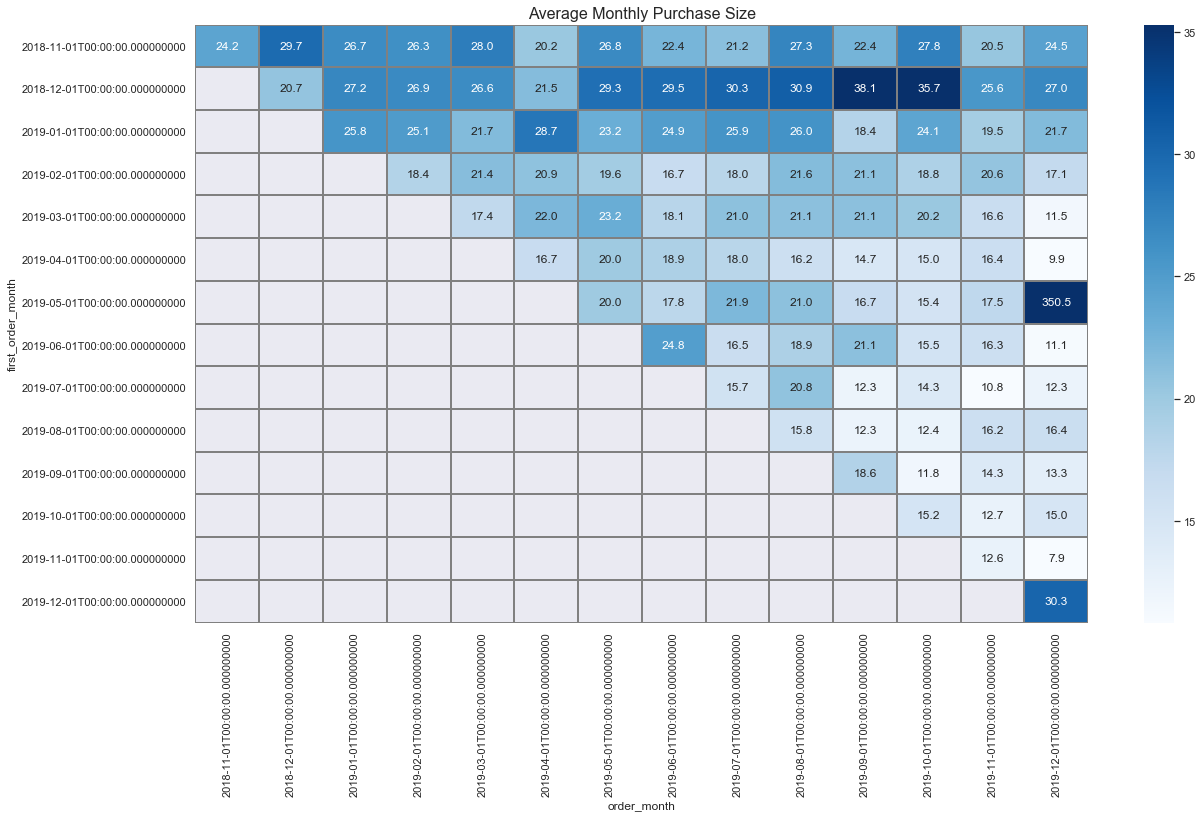

In [77]:
sns.set(style='dark')
plt.figure(figsize=(20, 11))
plt.title('Average Monthly Purchase Size', fontsize=16)
sns.heatmap(purchase_pivot,cmap="Blues",  annot=True, fmt='.1f', linewidths=1,robust=True, linecolor='gray')
plt.show()

The highest average purchase size at December 2018 justifys purchases before Christmas

In [78]:
orders_per_customer = data.groupby(['order_date']).agg({'customerid': ['count','nunique']})
orders_per_customer.columns = ['day_orders', 'n_users']


In [79]:
orders_per_customer['orders_per_customer'] = orders_per_customer['day_orders'] / orders_per_customer['n_users']
orders_per_customer.reset_index()

order_date  day_orders  n_users  orders_per_customer
0   2018-11-29        1898       95            19.978947
1   2018-11-30        1959       99            19.787879
2   2018-12-01        1086       50            21.720000
3   2018-12-03        2603       75            34.706667
4   2018-12-04        1897       82            23.134146
..         ...         ...      ...                  ...
300 2019-12-03        3335      105            31.761905
301 2019-12-04        2503      103            24.300971
302 2019-12-05        2135       94            22.712766
303 2019-12-06        2499      105            23.800000
304 2019-12-07         610       35            17.428571

[305 rows x 4 columns]

In [80]:
ltv_table = orders[['customerid','order_month','first_order_month','revenue']]
ltv_table.head()

customerid order_month first_order_month  revenue
0     17850.0  2018-11-01        2018-11-01    15.30
1     17850.0  2018-11-01        2018-11-01    20.34
2     17850.0  2018-11-01        2018-11-01    22.00
3     17850.0  2018-11-01        2018-11-01    20.34
4     17850.0  2018-11-01        2018-11-01    20.34

In [81]:
cohort_sizes = ltv_table.groupby('first_order_month').agg({'customerid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

first_order_month  n_buyers
0        2018-11-01       188
1        2018-12-01       697
2        2019-01-01       472
3        2019-02-01       368
4        2019-03-01       425

In [82]:
cohorts = ltv_table.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.sort_values(by='revenue',ascending=False)

first_order_month order_month    revenue
14         2018-12-01  2018-12-01  391657.83
25         2018-12-01  2019-11-01  372154.35
24         2018-12-01  2019-10-01  358198.97
23         2018-12-01  2019-09-01  338111.65
27         2019-01-01  2019-01-01  315348.10
..                ...         ...        ...
103        2019-11-01  2019-12-01    5864.73
49         2019-02-01  2019-12-01    5407.62
89         2019-07-01  2019-12-01    5023.55
83         2019-06-01  2019-12-01    4479.20
68         2019-04-01  2019-12-01    4018.27

[105 rows x 3 columns]

In [83]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

first_order_month  n_buyers order_month   revenue
0        2018-11-01       188  2018-11-01  93390.06
1        2018-11-01       188  2018-12-01  85374.84
2        2018-11-01       188  2019-01-01  70785.34
3        2018-11-01       188  2019-02-01  51493.64
4        2018-11-01       188  2019-03-01  77176.09

 Since margin rate is not given, i will take 0.5 

In [84]:
margin_rate = .5
report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report.head()

first_order_month  n_buyers order_month   revenue         gp  age
0        2018-11-01       188  2018-11-01  93390.06  46695.030    0
1        2018-11-01       188  2018-12-01  85374.84  42687.420    1
2        2018-11-01       188  2019-01-01  70785.34  35392.670    2
3        2018-11-01       188  2019-02-01  51493.64  25746.820    3
4        2018-11-01       188  2019-03-01  77176.09  38588.045    4

In [85]:
report['ltv'] = report['gp'] / report['n_buyers']
report.head()

first_order_month  n_buyers order_month   revenue         gp  age  \
0        2018-11-01       188  2018-11-01  93390.06  46695.030    0   
1        2018-11-01       188  2018-12-01  85374.84  42687.420    1   
2        2018-11-01       188  2019-01-01  70785.34  35392.670    2   
3        2018-11-01       188  2019-02-01  51493.64  25746.820    3   
4        2018-11-01       188  2019-03-01  77176.09  38588.045    4   

          ltv  
0  248.377819  
1  227.060745  
2  188.258883  
3  136.951170  
4  205.255559

In [86]:
output = report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='mean')
output.cumsum(axis=1).round(1).fillna('')


age                   0      1      2      3       4       5       6       7   \
first_order_month                                                               
2018-11-01         248.4  475.4  663.7  800.6  1005.9  1130.4    1378  1564.9   
2018-12-01         281.0  442.7    570  726.8   834.5  1020.8  1186.5  1360.6   
2019-01-01         334.1    392  466.6  546.9   649.8   735.6   818.8   907.2   
2019-02-01         219.0  256.6  304.4  369.1   417.6     467   529.3   607.4   
2019-03-01         214.6  246.3    319  364.5   425.5   477.4   545.9   633.2   
2019-04-01         201.3  245.9    285  321.6   359.3   406.2     455   510.1   
2019-05-01         217.0  249.4    285  316.2     365   424.7   493.4   785.5   
2019-06-01         283.5  318.2  346.4    410   466.8   553.1   562.8           
2019-07-01         223.5  252.6  294.3    342   392.9   405.3                   
2019-08-01         206.8  261.7  370.7  511.8   550.3                           
2019-09-01         261.9  313.9  374.7  393.5                                   
2019-10-01         238.8  300.8    314                                          
2019-11-01         213.2  222.8                                                 
2019-12-01         401.6                                                        

age                    8       9       10      11      12      13  
first_order_month                                                  
2018-11-01         1746.9  1978.7  2233.5  2563.2  2969.9  3080.4  
2018-12-01         1560.1  1802.6  2059.6  2326.5  2398.7          
2019-01-01          985.1  1118.7  1257.7  1279.9                  
2019-02-01          678.7   765.7   773.1                          
2019-03-01          709.8   719.7                                  
2019-04-01            517                                          
2019-05-01                                                         
2019-06-01                                                         
2019-07-01                                                         
2019-08-01                                                         
2019-09-01                                                         
2019-10-01                                                         
2019-11-01                                                         
2019-12-01

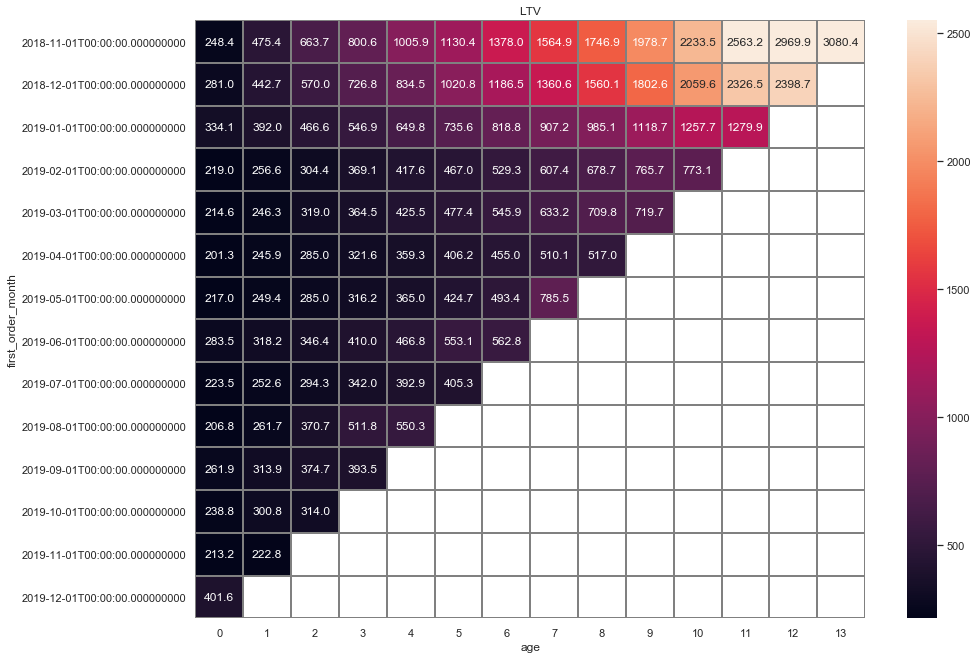

In [87]:
output_plot = output.cumsum(axis=1)
sns.set(style='white')
plt.figure(figsize=(15,11))
plt.title('LTV')
sns.heatmap(output_plot, annot=True, fmt='.1f', linewidths=1,robust=True, linecolor='gray')
plt.show()

The highest LTV is on Nov-Dec 2018, there ia also jump on 3'rd cohort Aug 2019

In [88]:
orders.sample()

invoiceno stockcode             description  quantity  \
207882    555257    47566B  TEA TIME PARTY BUNTING         1   

               invoicedate  unitprice  customerid       date  order_year  \
207882 2019-05-30 15:28:00       4.95     17596.0 2019-05-30        2019   

       order_month  order_week order_date  revenue    first_order_date  \
207882  2019-05-01          22 2019-05-30     4.95 2018-12-04 12:34:00   

       first_order_month  
207882        2018-12-01

In [89]:
orders['cohort_lifetime'] = orders['order_month'] - orders['first_order_month']
orders['cohort_lifetime'] = orders['cohort_lifetime'] / np.timedelta64(1,'M')
orders['cohort_lifetime'] = orders['cohort_lifetime'].round()

In [90]:
cohorts = orders.groupby(['first_order_month','cohort_lifetime']).agg({'customerid':'nunique'}).reset_index()
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_order_month','customerid']]
initial_users_count = initial_users_count = initial_users_count.rename(columns={'customerid':'cohort_users'})

cohorts = cohorts = cohorts.merge(initial_users_count,on='first_order_month')
cohorts['retention'] = cohorts['customerid']/cohorts['cohort_users']
retention_pivot_month = cohorts.pivot_table(index='first_order_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
retention_pivot_month

cohort_lifetime    0.0       1.0       2.0       3.0       4.0       5.0   \
first_order_month                                                           
2018-11-01          1.0  0.377660  0.367021  0.329787  0.361702  0.367021   
2018-12-01          1.0  0.383070  0.315638  0.385940  0.341463  0.398852   
2019-01-01          1.0  0.203390  0.266949  0.226695  0.324153  0.279661   
2019-02-01          1.0  0.168478  0.171196  0.288043  0.258152  0.236413   
2019-03-01          1.0  0.145882  0.263529  0.195294  0.237647  0.176471   
2019-04-01          1.0  0.211806  0.201389  0.208333  0.201389  0.218750   
2019-05-01          1.0  0.202020  0.164983  0.164983  0.205387  0.239057   
2019-06-01          1.0  0.186957  0.165217  0.252174  0.247826  0.321739   
2019-07-01          1.0  0.177340  0.192118  0.221675  0.261084  0.088670   
2019-08-01          1.0  0.176829  0.268293  0.292683  0.079268       NaN   
2019-09-01          1.0  0.235294  0.314879  0.107266       NaN       NaN   
2019-10-01          1.0  0.241470  0.094488       NaN       NaN       NaN   
2019-11-01          1.0  0.062092       NaN       NaN       NaN       NaN   
2019-12-01          1.0       NaN       NaN       NaN       NaN       NaN   

cohort_lifetime        6.0       7.0       8.0       9.0       10.0      11.0  \
first_order_month                                                               
2018-11-01         0.393617  0.382979  0.329787  0.367021  0.393617  0.382979   
2018-12-01         0.348637  0.352941  0.355811  0.377331  0.401722  0.520803   
2019-01-01         0.256356  0.254237  0.290254  0.317797  0.364407  0.080508   
2019-02-01         0.230978  0.274457  0.258152  0.301630  0.046196       NaN   
2019-03-01         0.251765  0.251765  0.263529  0.075294       NaN       NaN   
2019-04-01         0.218750  0.267361  0.052083       NaN       NaN       NaN   
2019-05-01         0.286195  0.053872       NaN       NaN       NaN       NaN   
2019-06-01         0.065217       NaN       NaN       NaN       NaN       NaN   
2019-07-01              NaN       NaN       NaN       NaN       NaN       NaN   
2019-08-01              NaN       NaN       NaN       NaN       NaN       NaN   
2019-09-01              NaN       NaN       NaN       NaN       NaN       NaN   
2019-10-01              NaN       NaN       NaN       NaN       NaN       NaN   
2019-11-01              NaN       NaN       NaN       NaN       NaN       NaN   
2019-12-01              NaN       NaN       NaN       NaN       NaN       NaN   

cohort_lifetime        12.0      13.0  
first_order_month                      
2018-11-01         0.489362  0.175532  
2018-12-01         0.215208       NaN  
2019-01-01              NaN       NaN  
2019-02-01              NaN       NaN  
2019-03-01              NaN       NaN  
2019-04-01              NaN       NaN  
2019-05-01              NaN       NaN  
2019-06-01              NaN       NaN  
2019-07-01              NaN       NaN  
2019-08-01              NaN       NaN  
2019-09-01              NaN       NaN  
2019-10-01              NaN       NaN  
2019-11-01              NaN       NaN  
2019-12-01              NaN       NaN

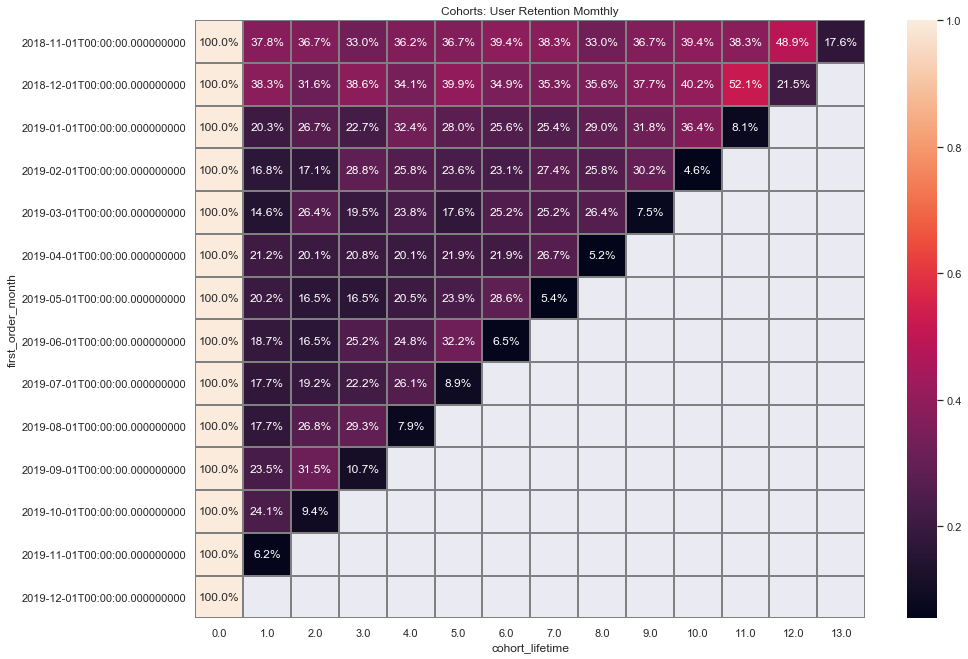

In [91]:
sns.set(style='dark')
plt.figure(figsize=(15, 11))
plt.title('Cohorts: User Retention Momthly')
sns.heatmap(retention_pivot_month, annot=True, fmt='.1%',robust=True, linewidths=1, linecolor='gray')

Retention rate looks steady during the whole (most) periode

[Back to top🔝](#up)

<a id='product'></a>
#### Product range analysis
* check top 30 most trending products
* check top 30 most profitable products
* determine most trending AND profitable products
* check sesonality such as summer/winter periodes and hollydays such as christmas 
* categorize products 
* determine single purchase and bundle purchase
* determine main and additional products in bundle purchase
 

In [92]:
data.sample()

invoiceno stockcode              description  quantity  \
245091    558754     22659  LUNCH BOX I LOVE LONDON         1   

               invoicedate  unitprice  customerid       date  order_year  \
245091 2019-07-01 12:10:00       1.95     15518.0 2019-07-01        2019   

        order_month  order_week order_date  revenue  
245091            7          27 2019-07-01     1.95

In [93]:
product = data.pivot_table(index = ['description'], values = 'revenue', aggfunc = ({'count','sum'})).reset_index()
product.columns = ['description', 'count','sum']
product.head()

description  count      sum
0   4 PURPLE FLOCK DINNER CANDLES     37   265.66
1   50'S CHRISTMAS GIFT BAG LARGE    109  2272.25
2               DOLLY GIRL BEAKER    135  2754.50
3     I LOVE LONDON MINI BACKPACK     69  1449.85
4     I LOVE LONDON MINI RUCKSACK      1     4.15

In [94]:
trending = product.nlargest(30,['count'])
trending.head()

description  count        sum
3918  WHITE HANGING HEART T-LIGHT HOLDER   2016  100392.10
2915            REGENCY CAKESTAND 3 TIER   1714  142264.75
1866             JUMBO BAG RED RETROSPOT   1615   85040.54
244        ASSORTED COLOUR BIRD ORNAMENT   1395   56413.03
2471                       PARTY BUNTING   1390   68785.23

In [95]:
profitable = product.nlargest(30,['sum'])
profitable.head()

description  count        sum
2445         PAPER CRAFT , LITTLE BIRDIE      1  168469.60
2915            REGENCY CAKESTAND 3 TIER   1714  142264.75
3918  WHITE HANGING HEART T-LIGHT HOLDER   2016  100392.10
1866             JUMBO BAG RED RETROSPOT   1615   85040.54
2104      MEDIUM CERAMIC TOP STORAGE JAR    198   81416.73

In [96]:
cross = trending[trending['description'].isin(profitable['description'])]
cross

description  count        sum
3918  WHITE HANGING HEART T-LIGHT HOLDER   2016  100392.10
2915            REGENCY CAKESTAND 3 TIER   1714  142264.75
1866             JUMBO BAG RED RETROSPOT   1615   85040.54
244        ASSORTED COLOUR BIRD ORNAMENT   1395   56413.03
2471                       PARTY BUNTING   1390   68785.23
2054             LUNCH BAG RED RETROSPOT   1303   27868.80
3195   SET OF 3 CAKE TINS PANTRY DESIGN    1152   33298.30
2753                             POSTAGE   1099   77803.96
3524                      SPOTTY BUNTING   1014   35509.55
2439     PAPER CHAIN KIT 50'S CHRISTMAS    1003   42584.13
1710               HEART OF WICKER SMALL    979   28217.09
165            ALARM CLOCK BAKELIKE RED     886   25868.95
1864             JUMBO BAG PINK POLKADOT    884   37254.36
1833            JAM MAKING SET WITH JARS    880   32616.22

We have 15 most trending and profitable products out of 30 most trending and 30 most profitable

[Back to top🔝](#up)

#### Let's add season columns to the table:

In [97]:
from datetime import date, datetime
Y = 2000 # dummy leap year to allow input X-02-29 (leap day)
seasons = [('winter', (date(Y,  1,  1),  date(Y,  2, 28))),
           ('spring', (date(Y,  3, 1),  date(Y,  5, 31))),
           ('summer', (date(Y,  6, 1),  date(Y,  8, 31))),
           ('autumn', (date(Y,  9, 1),  date(Y, 10, 31))),
           ('winter', (date(Y, 11, 1),  date(Y, 12, 31)))]

def get_season(now):
    if isinstance(now, datetime):
        now = now.date()
    now = now.replace(year=Y)
    return next(season for season, (start, end) in seasons
                if start <= now <= end)

print(get_season(date.today()))

winter


In [98]:
data['season'] = data['date'].apply(get_season)
data.head()

invoiceno stockcode                          description  quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          invoicedate  unitprice  customerid       date  order_year  \
0 2018-11-29 08:26:00       2.55     17850.0 2018-11-29        2018   
1 2018-11-29 08:26:00       3.39     17850.0 2018-11-29        2018   
2 2018-11-29 08:26:00       2.75     17850.0 2018-11-29        2018   
3 2018-11-29 08:26:00       3.39     17850.0 2018-11-29        2018   
4 2018-11-29 08:26:00       3.39     17850.0 2018-11-29        2018   

   order_month  order_week order_date  revenue  season  
0           11          48 2018-11-29    15.30  winter  
1           11          48 2018-11-29    20.34  winter  
2           11          48 2018-11-29    22.00  winter  
3           11          48 2018-11-29    20.34  winter  
4           11          48 2018-11-29    20.34  winter

In [99]:
winter_sales = data.query('season=="winter"')
winter_sales.head()

invoiceno stockcode                          description  quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          invoicedate  unitprice  customerid       date  order_year  \
0 2018-11-29 08:26:00       2.55     17850.0 2018-11-29        2018   
1 2018-11-29 08:26:00       3.39     17850.0 2018-11-29        2018   
2 2018-11-29 08:26:00       2.75     17850.0 2018-11-29        2018   
3 2018-11-29 08:26:00       3.39     17850.0 2018-11-29        2018   
4 2018-11-29 08:26:00       3.39     17850.0 2018-11-29        2018   

   order_month  order_week order_date  revenue  season  
0           11          48 2018-11-29    15.30  winter  
1           11          48 2018-11-29    20.34  winter  
2           11          48 2018-11-29    22.00  winter  
3           11          48 2018-11-29    20.34  winter  
4           11          48 2018-11-29    20.34  winter

In [100]:
data.query('season=="winter" & order_year=="2018"')['revenue'].sum().round()

570423.0

In [101]:
data.revenue.sum()

8887208.894000003

In [102]:
pie_chart = (
    data
    .query('order_year=="2019"')
    .pivot_table(index='season', values='revenue',aggfunc=['sum'])       
)
pie_chart

sum
            revenue
season             
autumn  1986376.172
spring  1740982.811
summer  1927163.171
winter  2662264.010

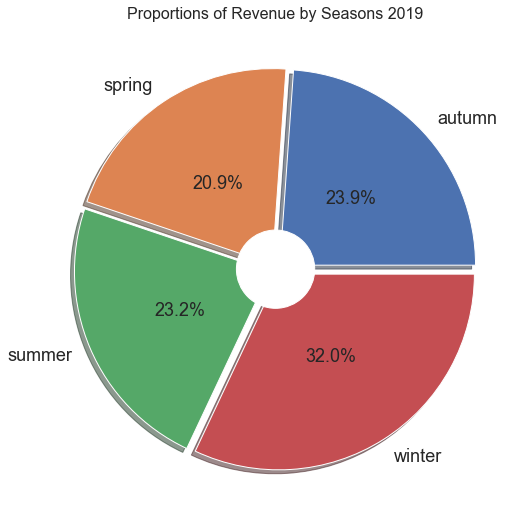

In [103]:
pie, ax = plt.subplots(figsize=[13,9])
labels = 'autumn','spring','summer','winter'
plt.pie(x=pie_chart, autopct="%.1f%%",explode=[0.03]*4, labels=labels,   shadow=True, pctdistance=0.5,textprops={'fontsize': 18})
plt.title("Proportions of Revenue by Seasons 2019", fontsize=16);
centre_circle = plt.Circle((0,0),0.20,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

Winter time is the most profitable periode

In [104]:
data.query('"2018-11-29" <= date <= "2018-12-07"')['revenue'].sum().round()

310656.0

In [105]:
data.query('"2019-11-29" <= date <= "2019-12-07"')['revenue'].sum().round()

517190.0

In [106]:
christmas_periode =data.query('"2018-11-29" <= date <= "2018-12-07" | "2019-11-29" <= date <= "2019-12-07"') 
christmas_periode.head()

invoiceno stockcode                          description  quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          invoicedate  unitprice  customerid       date  order_year  \
0 2018-11-29 08:26:00       2.55     17850.0 2018-11-29        2018   
1 2018-11-29 08:26:00       3.39     17850.0 2018-11-29        2018   
2 2018-11-29 08:26:00       2.75     17850.0 2018-11-29        2018   
3 2018-11-29 08:26:00       3.39     17850.0 2018-11-29        2018   
4 2018-11-29 08:26:00       3.39     17850.0 2018-11-29        2018   

   order_month  order_week order_date  revenue  season  
0           11          48 2018-11-29    15.30  winter  
1           11          48 2018-11-29    20.34  winter  
2           11          48 2018-11-29    22.00  winter  
3           11          48 2018-11-29    20.34  winter  
4           11          48 2018-11-29    20.34  winter

In [107]:
christmas_periode_sales = christmas_periode.groupby('order_year').agg({'revenue':'sum'})
christmas_periode_sales

revenue
order_year           
2018        310656.37
2019        517190.44

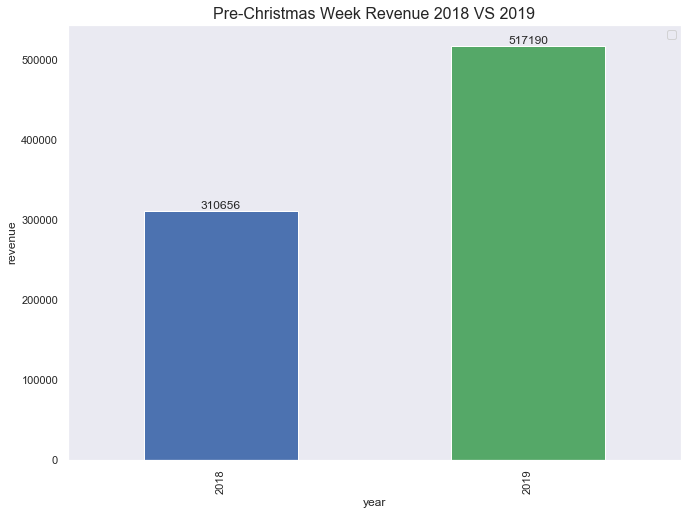

In [108]:
christmas_periode_sales.plot.bar(figsize=(11,8),color='b''g')
for i, val in enumerate(christmas_periode_sales['revenue'].values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})
plt.title('Pre-Christmas Week Revenue 2018 VS 2019',fontsize=16)
plt.xlabel('year', fontsize=12)
plt.ylabel('revenue', fontsize=12)
plt.legend('')
plt.show()

By given dates we van compare revenues between particular week (pre-Christmas periode) in 2018 VS 2019. The 2019'th was much more profitable with total revenue of 518193 and 311878 respectively.

In [109]:
winter_products = winter_sales.pivot_table(index = ['description'], values = 'revenue', aggfunc = ({'count','sum'})).reset_index()
winter_products.columns = ['description', 'count','sum']
winter_products.head(10)

description  count      sum
0     4 PURPLE FLOCK DINNER CANDLES     22   194.26
1     50'S CHRISTMAS GIFT BAG LARGE     34   613.75
2                 DOLLY GIRL BEAKER     33   272.50
3       I LOVE LONDON MINI BACKPACK     24   656.45
4       I LOVE LONDON MINI RUCKSACK      0     0.00
5           NINE DRAWER OFFICE TIDY     14   374.00
6        OVAL WALL MIRROR DIAMANTE      24   398.00
7           RED SPOT GIFT BAG LARGE     30   525.00
8   SET 2 TEA TOWELS I LOVE LONDON      96  2456.65
9            SPACEBOY BABY GIFT SET     20   777.50

In [110]:
trending_winter = winter_products.nlargest(30,['count'])
trending_winter.head()

description  count       sum
3918  WHITE HANGING HEART T-LIGHT HOLDER    776  45329.37
2915            REGENCY CAKESTAND 3 TIER    582  55738.32
2439     PAPER CHAIN KIT 50'S CHRISTMAS     575  23811.38
2803                  RABBIT NIGHT LIGHT    537  28278.81
1866             JUMBO BAG RED RETROSPOT    502  25990.75

In [111]:
profitable_winter = winter_products.nlargest(30,['sum'])
profitable_winter.head()

description  count        sum
2445         PAPER CRAFT , LITTLE BIRDIE      1  168469.60
2104      MEDIUM CERAMIC TOP STORAGE JAR     37   78093.97
2915            REGENCY CAKESTAND 3 TIER    582   55738.32
3918  WHITE HANGING HEART T-LIGHT HOLDER    776   45329.37
2803                  RABBIT NIGHT LIGHT    537   28278.81

In [112]:
cross_winter = trending_winter[trending_winter['description'].isin(profitable_winter['description'])]
cross_winter

description  count       sum
3918  WHITE HANGING HEART T-LIGHT HOLDER    776  45329.37
2915            REGENCY CAKESTAND 3 TIER    582  55738.32
2439     PAPER CHAIN KIT 50'S CHRISTMAS     575  23811.38
2803                  RABBIT NIGHT LIGHT    537  28278.81
1866             JUMBO BAG RED RETROSPOT    502  25990.75
1710               HEART OF WICKER SMALL    475  13907.66
244        ASSORTED COLOUR BIRD ORNAMENT    462  18546.62
3195   SET OF 3 CAKE TINS PANTRY DESIGN     459  11856.39
2444   PAPER CHAIN KIT VINTAGE CHRISTMAS    407  13204.03
2753                             POSTAGE    406  25668.95
780           CHOCOLATE HOT WATER BOTTLE    398  13509.00
1709               HEART OF WICKER LARGE    395  15843.68
3072        SCOTTIE DOG HOT WATER BOTTLE    380  10792.50
2253     NATURAL SLATE HEART CHALKBOARD     377   9525.86
2847    RED HANGING HEART T-LIGHT HOLDER    364  12851.09
165            ALARM CLOCK BAKELIKE RED     354   9881.90
1833            JAM MAKING SET WITH JARS    336  12195.04
1769          HOT WATER BOTTLE KEEP CALM    327  11041.95

In [114]:
cross_winter_all = cross[cross['description'].isin(cross_winter['description'])]
cross_winter_all

description  count        sum
3918  WHITE HANGING HEART T-LIGHT HOLDER   2016  100392.10
2915            REGENCY CAKESTAND 3 TIER   1714  142264.75
1866             JUMBO BAG RED RETROSPOT   1615   85040.54
244        ASSORTED COLOUR BIRD ORNAMENT   1395   56413.03
3195   SET OF 3 CAKE TINS PANTRY DESIGN    1152   33298.30
2753                             POSTAGE   1099   77803.96
2439     PAPER CHAIN KIT 50'S CHRISTMAS    1003   42584.13
1710               HEART OF WICKER SMALL    979   28217.09
165            ALARM CLOCK BAKELIKE RED     886   25868.95
1833            JAM MAKING SET WITH JARS    880   32616.22

We have 11 products which are most trending and profitable out of top 30 products

[Back to top🔝](#up)

<a id='cat'></a>
#### Product categories

In [115]:
ecom = data.copy()

In [116]:
ecom.description.str.lower()

0          white hanging heart t-light holder
1                         white metal lantern
2              cream cupid hearts coat hanger
3         knitted union flag hot water bottle
4              red woolly hottie white heart.
                         ...                 
536636            pack of 20 spaceboy napkins
536637           children's apron dolly girl 
536638          childrens cutlery dolly girl 
536639        childrens cutlery circus parade
536640          baking set 9 piece retrospot 
Name: description, Length: 392732, dtype: object

In [117]:
ecom['description'] = ecom['description'].str.lower()
ecom.head()

invoiceno stockcode                          description  quantity  \
0    536365    85123A   white hanging heart t-light holder         6   
1    536365     71053                  white metal lantern         6   
2    536365    84406B       cream cupid hearts coat hanger         8   
3    536365    84029G  knitted union flag hot water bottle         6   
4    536365    84029E       red woolly hottie white heart.         6   

          invoicedate  unitprice  customerid       date  order_year  \
0 2018-11-29 08:26:00       2.55     17850.0 2018-11-29        2018   
1 2018-11-29 08:26:00       3.39     17850.0 2018-11-29        2018   
2 2018-11-29 08:26:00       2.75     17850.0 2018-11-29        2018   
3 2018-11-29 08:26:00       3.39     17850.0 2018-11-29        2018   
4 2018-11-29 08:26:00       3.39     17850.0 2018-11-29        2018   

   order_month  order_week order_date  revenue  season  
0           11          48 2018-11-29    15.30  winter  
1           11          48 2018-11-29    20.34  winter  
2           11          48 2018-11-29    22.00  winter  
3           11          48 2018-11-29    20.34  winter  
4           11          48 2018-11-29    20.34  winter

In [118]:
ecom = ecom[ecom.description.notnull()]
ecom.head()


invoiceno stockcode                          description  quantity  \
0    536365    85123A   white hanging heart t-light holder         6   
1    536365     71053                  white metal lantern         6   
2    536365    84406B       cream cupid hearts coat hanger         8   
3    536365    84029G  knitted union flag hot water bottle         6   
4    536365    84029E       red woolly hottie white heart.         6   

          invoicedate  unitprice  customerid       date  order_year  \
0 2018-11-29 08:26:00       2.55     17850.0 2018-11-29        2018   
1 2018-11-29 08:26:00       3.39     17850.0 2018-11-29        2018   
2 2018-11-29 08:26:00       2.75     17850.0 2018-11-29        2018   
3 2018-11-29 08:26:00       3.39     17850.0 2018-11-29        2018   
4 2018-11-29 08:26:00       3.39     17850.0 2018-11-29        2018   

   order_month  order_week order_date  revenue  season  
0           11          48 2018-11-29    15.30  winter  
1           11          48 2018-11-29    20.34  winter  
2           11          48 2018-11-29    22.00  winter  
3           11          48 2018-11-29    20.34  winter  
4           11          48 2018-11-29    20.34  winter

In [119]:
ecom['category'] = ecom['description'].apply(lambda words: TextBlob(words).noun_phrases)

In [120]:
ecom.sample()

invoiceno stockcode                  description  quantity  \
331727    566239     21175  gin + tonic diet metal sign        12   

               invoicedate  unitprice  customerid       date  order_year  \
331727 2019-09-09 11:26:00       2.55     14665.0 2019-09-09        2019   

        order_month  order_week order_date  revenue  season  \
331727            9          37 2019-09-09     30.6  autumn   

                        category  
331727  [gin + tonic diet metal]

In [121]:
ecom['category'].value_counts().head(10)

TypeError: unhashable type: 'WordList'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'WordList'


[]                            34059
[heart t-light holder]         2797
[hot water bottle]             2175
[alarm clock bakelike]         1869
[jam making]                   1750
[regency cakestand]            1714
[jumbo bag, red retrospot]     1615
[colour bird ornament]         1395
[lunch bag, red retrospot]     1303
[cake tins pantry design]      1152
Name: category, dtype: int64

In [122]:
ecom['words'] = ecom['description'].apply(lambda words: TextBlob(words).words)
ecom.sample()

invoiceno stockcode                      description  quantity  \
261613    560034     22666  recipe box pantry yellow design         6   

               invoicedate  unitprice  customerid       date  order_year  \
261613 2019-07-12 13:35:00       2.95     13933.0 2019-07-12        2019   

        order_month  order_week order_date  revenue  season  \
261613            7          28 2019-07-12     17.7  summer   

                                  category  \
261613  [recipe box pantry, yellow design]   

                                        words  
261613  [recipe, box, pantry, yellow, design]

In [123]:
ecom['words'].value_counts().head(10)

TypeError: unhashable type: 'WordList'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'WordList'


[white, hanging, heart, t-light, holder]    2016
[regency, cakestand, 3, tier]               1714
[jumbo, bag, red, retrospot]                1615
[assorted, colour, bird, ornament]          1395
[party, bunting]                            1390
[lunch, bag, red, retrospot]                1303
[set, of, 3, cake, tins, pantry, design]    1152
[postage]                                   1099
[lunch, bag, black, skull]                  1078
[lunch, bag, suki, design]                  1063
Name: words, dtype: int64

In [124]:
len(ecom['category'].value_counts())

3276

In [126]:
ecom.groupby(['invoiceno'])['invoicedate'].nunique().reset_index().sort_values(by='invoicedate', ascending=False)

invoiceno  invoicedate
4196     545460            2
2934     542806            2
8639     554116            2
2372     541596            2
13085    563245            2
...         ...          ...
19918    577145            0
19917    577144            0
8944     554830            0
8943     554829            0
25899   C581569            0

[25900 rows x 2 columns]

In [127]:
ecom[ecom.unitprice>0]['description'].value_counts()

white hanging heart t-light holder    2016
regency cakestand 3 tier              1713
jumbo bag red retrospot               1615
assorted colour bird ornament         1395
party bunting                         1389
                                      ... 
pearl & shell 42"neckl. ivory            1
dolphin windmill                         1
capiz chandelier                         1
flag of st george car flag               1
purple enamel flower hair tie            1
Name: description, Length: 3877, dtype: int64

In [188]:
def category_group(ecom):
    if 'bag' in ecom or 'jumbo' in ecom or 'backpack' in ecom or 'wallet' in ecom:
        return 'bags'
    elif 'lunch' in ecom or 'box' in ecom or 'bowl' in ecom or 'jar' in ecom:
        return 'food storage'
    elif 'hot' in ecom or 'bottle' in ecom or 'water' in ecom:
        return 'beverage storage'
    elif 'jam' in ecom or 'cake' in ecom or 'cakestand' in ecom or 'baking' in ecom or 'brush' in ecom or 'oven' in ecom or 'plate' in ecom or 'cutlery' in ecom or 'bake' in ecom:
        return 'baking'
    elif 'spoon' in ecom or 'tea' in ecom or 'cofee' in ecom or 'mug' in ecom or 'teacup' in ecom or 'baking' in ecom or 'cup' in ecom or 'biscuit' in ecom:
        return 'tea & cofee'
    elif 'bracelet' in ecom or 'necklace' in ecom or 'earings' in ecom or 'earrings' in ecom:
        return 'jewelery'
    elif 'christmas' in ecom or 'warmer' in ecom or 'winter' in ecom:
        return 'christmas gifts'
    elif 'party' in ecom or 'bunting' in ecom or 'chain' in ecom or 'birthday' in ecom or 'banner' in ecom:
        return 'party'
    elif 't-light' in ecom or 'rabbit' in ecom or 'lantern' in ecom or 'candel' in ecom or 'candels' in ecom or 'night' in ecom:  
        return 'lighting'
    elif 'wicker' in ecom or 'home' in ecom or 'cushion' in ecom or 'cover' in ecom or 'clock' in ecom or 'alarm' in ecom or 'frame' in 'ecom'  or 'decoration' in ecom or 'sign' in ecom or 'doormat' in ecom or 'art' in ecom:
        return 'home decor'
    elif 'cabinet' in ecom or 'drawer' in ecom or 'desc' in ecom or 'chair' in ecom or 'shelf' in ecom or 'stool' in ecom or 'rack' in ecom:
        return 'furniture'
    elif 'magnets' in ecom or 'magnet' in ecom or 'kitchen' in ecom or 'napkins' in ecom or 'recipe' in ecom or 'apron' in ecom:
        return 'kitchen decor'
    elif 'snap cards' in ecom or 'card game' in ecom or 'game' in ecom or 'chest' in ecom or 'snakes'in ecom or 'domino & ladders' in ecom or 'domino' in ecom or 'bingo' in ecom or 'playing cards' in ecom or 'toy' in ecom or 'poppy' in ecom or 'tidy' in ecom or 'soldier' in ecom or 'board' in ecom:
        return 'toys'
    elif 'crayon' in ecom or 'stationery' in ecom or 'colour' in ecom or 'pencil' in ecom or 'notebooks' in ecom or 'tags' in ecom or 'paint' in ecom or 'chalk sticks' in ecom or 'book' in ecom or 'writing' in ecom or 'ruler' in ecom:
        return 'scholar'
    else:
        return 'other'
ecom['category_group'] = ecom['words'].apply(category_group)
ecom.head()

invoiceno  customerid stockcode                          description  \
0    536365     17850.0    85123A   white hanging heart t-light holder   
1    536365     17850.0     71053                  white metal lantern   
2    536365     17850.0    84406B       cream cupid hearts coat hanger   
3    536365     17850.0    84029G  knitted union flag hot water bottle   
4    536365     17850.0    84029E       red woolly hottie white heart.   

   quantity  revenue         invoicedate    first_order_date  season  \
0         6    15.30 2018-11-29 08:26:00 2018-11-29 08:26:00  winter   
1         6    20.34 2018-11-29 08:26:00 2018-11-29 08:26:00  winter   
2         8    22.00 2018-11-29 08:26:00 2018-11-29 08:26:00  winter   
3         6    20.34 2018-11-29 08:26:00 2018-11-29 08:26:00  winter   
4         6    20.34 2018-11-29 08:26:00 2018-11-29 08:26:00  winter   

                           category  \
0            [heart t-light holder]   
1             [white metal lantern]   
2  [cream cupid hearts coat hanger]   
3    [union flag, hot water bottle]   
4                     [white heart]   

                                        words    category_group  \
0    [white, hanging, heart, t-light, holder]          lighting   
1                     [white, metal, lantern]          lighting   
2        [cream, cupid, hearts, coat, hanger]             other   
3  [knitted, union, flag, hot, water, bottle]  beverage storage   
4         [red, woolly, hottie, white, heart]             other   

     purchase_type product_type  
0  bundle purchase         main  
1  bundle purchase     not main  
2  bundle purchase     not main  
3  bundle purchase     not main  
4  bundle purchase     not main

In [189]:
ecom.category_group.value_counts()

other               144678
home decor           44547
bags                 41948
baking               29037
food storage         25922
christmas gifts      19430
tea & cofee          18308
lighting             14448
party                12695
beverage storage      9496
kitchen decor         8804
furniture             8303
scholar               8000
toys                  6257
jewelery               859
Name: category_group, dtype: int64

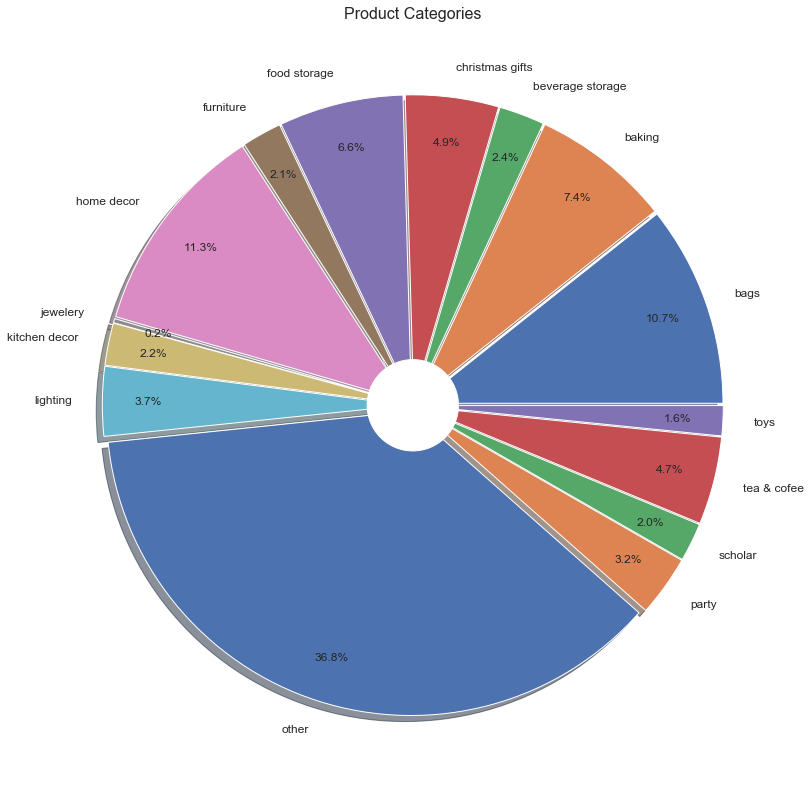

In [190]:
pie_chart_cat = ecom.groupby('category_group')['description'].count()
pie, ax = plt.subplots(figsize=[17,14])
labels = pie_chart_cat.keys()
plt.pie(x=pie_chart_cat, autopct="%.1f%%",explode=[0.02]*15, labels=labels,   shadow=True, pctdistance=0.85,textprops={'fontsize': 12})
plt.title("Product Categories", fontsize=16);
centre_circle = plt.Circle((0,0),0.15,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

 Baking accessories, home decor, bags and food storage (lunch boxes) are the largest categories (from given categories) 

In [191]:
ecom['first_order_date'] = ecom['invoicedate'].min()
ecom.sample()

invoiceno  customerid stockcode                       description  \
119304    552013     12451.0     21578  woodland design  cotton tote bag   

        quantity  revenue         invoicedate    first_order_date  season  \
119304        12     27.0 2019-05-03 17:34:00 2018-11-29 08:26:00  spring   

                                 category  \
119304  [woodland design cotton tote bag]   

                                        words category_group    purchase_type  \
119304  [woodland, design, cotton, tote, bag]           bags  bundle purchase   

       product_type  
119304     not main

In [192]:
ecom = ecom[['invoiceno','customerid', 'stockcode', 'description', 'quantity','revenue', 'invoicedate','first_order_date','season','category','words','category_group']]
ecom.head()

invoiceno  customerid stockcode                          description  \
0    536365     17850.0    85123A   white hanging heart t-light holder   
1    536365     17850.0     71053                  white metal lantern   
2    536365     17850.0    84406B       cream cupid hearts coat hanger   
3    536365     17850.0    84029G  knitted union flag hot water bottle   
4    536365     17850.0    84029E       red woolly hottie white heart.   

   quantity  revenue         invoicedate    first_order_date  season  \
0         6    15.30 2018-11-29 08:26:00 2018-11-29 08:26:00  winter   
1         6    20.34 2018-11-29 08:26:00 2018-11-29 08:26:00  winter   
2         8    22.00 2018-11-29 08:26:00 2018-11-29 08:26:00  winter   
3         6    20.34 2018-11-29 08:26:00 2018-11-29 08:26:00  winter   
4         6    20.34 2018-11-29 08:26:00 2018-11-29 08:26:00  winter   

                           category  \
0            [heart t-light holder]   
1             [white metal lantern]   
2  [cream cupid hearts coat hanger]   
3    [union flag, hot water bottle]   
4                     [white heart]   

                                        words    category_group  
0    [white, hanging, heart, t-light, holder]          lighting  
1                     [white, metal, lantern]          lighting  
2        [cream, cupid, hearts, coat, hanger]             other  
3  [knitted, union, flag, hot, water, bottle]  beverage storage  
4         [red, woolly, hottie, white, heart]             other

In [194]:
alt_pivot = ecom.groupby('invoiceno')['stockcode'].nunique().reset_index().sort_values(by='stockcode',ascending=False)
alt_pivot.head()

invoiceno  stockcode
19451    576339        541
20915    579196        529
21643    580727        525
20466    578270        439
18132    573576        434

In [195]:
single_purchase = alt_pivot.query('stockcode==1')
bundle_purchase = alt_pivot.query('stockcode>1')
print('single purchases',single_purchase.shape[0])
print('bundle purchases',bundle_purchase.shape[0])
print('ratio between singe purchase to bundle purchase',(single_purchase.shape[0]/bundle_purchase.shape[0]*100),'%' )

single purchases 1406
bundle purchases 17130
ratio between singe purchase to bundle purchase 8.20782253356684 %


In [196]:
def sing_bund(amount):
    try:
        if amount ==1:
            return 'single purchase'
        else:
            return 'bundle purchase'
    except:
            return 'undefined'
alt_pivot['purchase_type'] = alt_pivot['stockcode'].apply(sing_bund)       

In [197]:
alt_pivot.drop(['stockcode'],axis='columns',inplace=True)

In [198]:
alt_pivot.head()

invoiceno    purchase_type
19451    576339  bundle purchase
20915    579196  bundle purchase
21643    580727  bundle purchase
20466    578270  bundle purchase
18132    573576  bundle purchase

In [199]:
ecom=ecom.merge(alt_pivot, on='invoiceno', how='left')
ecom.head()

invoiceno  customerid stockcode                          description  \
0    536365     17850.0    85123A   white hanging heart t-light holder   
1    536365     17850.0     71053                  white metal lantern   
2    536365     17850.0    84406B       cream cupid hearts coat hanger   
3    536365     17850.0    84029G  knitted union flag hot water bottle   
4    536365     17850.0    84029E       red woolly hottie white heart.   

   quantity  revenue         invoicedate    first_order_date  season  \
0         6    15.30 2018-11-29 08:26:00 2018-11-29 08:26:00  winter   
1         6    20.34 2018-11-29 08:26:00 2018-11-29 08:26:00  winter   
2         8    22.00 2018-11-29 08:26:00 2018-11-29 08:26:00  winter   
3         6    20.34 2018-11-29 08:26:00 2018-11-29 08:26:00  winter   
4         6    20.34 2018-11-29 08:26:00 2018-11-29 08:26:00  winter   

                           category  \
0            [heart t-light holder]   
1             [white metal lantern]   
2  [cream cupid hearts coat hanger]   
3    [union flag, hot water bottle]   
4                     [white heart]   

                                        words    category_group  \
0    [white, hanging, heart, t-light, holder]          lighting   
1                     [white, metal, lantern]          lighting   
2        [cream, cupid, hearts, coat, hanger]             other   
3  [knitted, union, flag, hot, water, bottle]  beverage storage   
4         [red, woolly, hottie, white, heart]             other   

     purchase_type  
0  bundle purchase  
1  bundle purchase  
2  bundle purchase  
3  bundle purchase  
4  bundle purchase

In [200]:
pie_chart2 = (
    ecom
    .pivot_table(index='purchase_type', values='revenue',aggfunc=['sum'])       
)

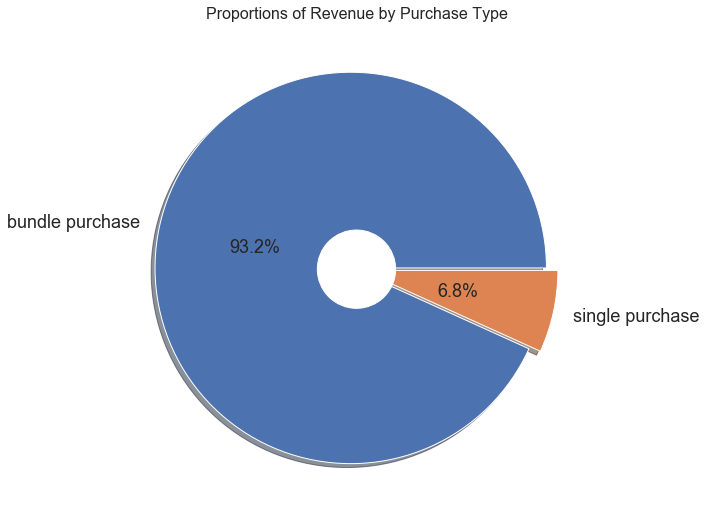

In [201]:
pie, ax = plt.subplots(figsize=[13,9])
labels = 'bundle purchase','single purchase'
plt.pie(x=pie_chart2, autopct="%.1f%%",explode=[0.03]*2, labels=labels,   shadow=True, pctdistance=0.5,textprops={'fontsize': 18})
plt.title("Proportions of Revenue by Purchase Type", fontsize=16);
centre_circle = plt.Circle((0,0),0.20,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [202]:
single_purchase_items = ecom.query('purchase_type=="single purchase"')

In [203]:
bundle_purchase_items = ecom.query('purchase_type=="bundle purchase"')

In [204]:
bundle_list = ecom.query('purchase_type=="bundle purchase"')['description'].unique()
bundle_list

array(['white hanging heart t-light holder', 'white metal lantern',
       'cream cupid hearts coat hanger', ..., 'letter "z" bling key ring',
       'pink crystal skull phone charm',
       'cream hanging heart t-light holder'], dtype=object)

In [205]:
single_prods=single_purchase_items[~single_purchase_items['description'].isin(bundle_list)]
single_prods.head(10)

invoiceno  customerid     stockcode                        description  \
3121      536779     15823.0  BANK CHARGES                       bank charges   
3529      536811     15299.0         22275   weekend bag vintage rose paisley   
11905     537827     15332.0         22145    christmas craft heart stocking    
36894     541505     15939.0  BANK CHARGES                       bank charges   
102013    549717     14606.0  BANK CHARGES                       bank charges   
110390    550713     15159.0         23071  marie antoienett trinket box gold   
118445    551945     16714.0  BANK CHARGES                       bank charges   
153601    556444     15098.0         22502     picnic basket wicker 60 pieces   
153602    556446     15098.0         22502     picnic basket wicker 60 pieces   
229683    565735     16904.0  BANK CHARGES                       bank charges   

        quantity   revenue         invoicedate    first_order_date  season  \
3121           1     15.00 2018-11-30 15:08:00 2018-11-29 08:26:00  winter   
3529          69    527.85 2018-11-30 16:51:00 2018-11-29 08:26:00  winter   
11905         30     63.00 2018-12-06 14:43:00 2018-11-29 08:26:00  winter   
36894          1     15.00 2019-01-16 15:58:00 2018-11-29 08:26:00  winter   
102013         1     15.00 2019-04-09 14:56:00 2018-11-29 08:26:00  spring   
110390         1     12.50 2019-04-18 11:11:00 2018-11-29 08:26:00  spring   
118445         1     15.00 2019-05-03 11:09:00 2018-11-29 08:26:00  spring   
153601        60  38970.00 2019-06-08 15:28:00 2018-11-29 08:26:00  summer   
153602         1    649.50 2019-06-08 15:33:00 2018-11-29 08:26:00  summer   
229683         1     15.00 2019-09-04 12:25:00 2018-11-29 08:26:00  autumn   

                              category  \
3121                    [bank charges]   
3529             [weekend bag vintage]   
11905          [christmas craft heart]   
36894                   [bank charges]   
102013                  [bank charges]   
110390  [marie antoienett trinket box]   
118445                  [bank charges]   
153601          [picnic basket wicker]   
153602          [picnic basket wicker]   
229683                  [bank charges]   

                                          words   category_group  \
3121                            [bank, charges]            other   
3529     [weekend, bag, vintage, rose, paisley]             bags   
11905       [christmas, craft, heart, stocking]  christmas gifts   
36894                           [bank, charges]            other   
102013                          [bank, charges]            other   
110390  [marie, antoienett, trinket, box, gold]     food storage   
118445                          [bank, charges]            other   
153601     [picnic, basket, wicker, 60, pieces]       home decor   
153602     [picnic, basket, wicker, 60, pieces]       home decor   
229683                          [bank, charges]            other   

          purchase_type  
3121    single purchase  
3529    single purchase  
11905   single purchase  
36894   single purchase  
102013  single purchase  
110390  single purchase  
118445  single purchase  
153601  single purchase  
153602  single purchase  
229683  single purchase

In [206]:
single_prods.shape

(21, 13)

I splited data to single and bundle purchase, categorized by purchase type (single/bundle) and made a list with products that were purchased as bundle and also checked which single products are not exist in bundle purchase. There is a minority of those unexisted singles. Now I'm going to define top 100 products which are sold with another products

In [207]:
ecom.quantity.sum()

5165886

In [208]:
ecom.description.nunique()

3877

In [209]:
product1 = ecom.pivot_table(index = ['description'], values = 'quantity', aggfunc = ({'sum'})).sort_values(by='sum', ascending=False).reset_index()
product1.columns = ['description','quantity']
top_100 = product1.nlargest(100,['quantity'])
top_100.head()

description  quantity
0         paper craft , little birdie     80995
1      medium ceramic top storage jar     77916
2   world war 2 gliders asstd designs     54319
3             jumbo bag red retrospot     46078
4  white hanging heart t-light holder     36706

In [210]:
top_100_list = top_100.description.unique()
top_100_list

array(['paper craft , little birdie', 'medium ceramic top storage jar',
       'world war 2 gliders asstd designs', 'jumbo bag red retrospot',
       'white hanging heart t-light holder',
       'assorted colour bird ornament', 'pack of 72 retrospot cake cases',
       'popcorn holder', 'rabbit night light', 'mini paint set vintage ',
       'pack of 12 london tissues ', 'pack of 60 pink paisley cake cases',
       'brocade ring purse ', 'victorian glass hanging t-light',
       'assorted colours silk fan', 'red  harmonica in box ',
       'jumbo bag pink polkadot', 'small popcorn holder',
       '60 teatime fairy cake cases', 'lunch bag red retrospot',
       'jumbo bag strawberry', 'heart of wicker small',
       'grow a flytrap or sunflower in tin',
       "paper chain kit 50's christmas ",
       'colour glass t-light holder hanging', 'party bunting',
       'jam making set printed', 'place setting white heart',
       '60 cake cases vintage christmas', 'pack of 72 skull cake cases

In [211]:
top_100['quantity'].sum()

1566334

In [212]:
top_100['quantity'].sum()/ecom.quantity.sum()

0.3032072329896556

There is 30% items which are 1,566,334 items out of 5,165,886 in Top 100 items.

In [213]:
main_prod = bundle_purchase_items[bundle_purchase_items['description'].isin(top_100['description'])]
main_prod.head()

invoiceno  customerid stockcode                         description  \
0     536365     17850.0    85123A  white hanging heart t-light holder   
9     536367     13047.0     84879       assorted colour bird ornament   
35    536370     12583.0     22629                 spaceboy lunch box    
36    536370     12583.0     22659             lunch box i love london   
39    536370     12583.0     21731       red toadstool led night light   

    quantity  revenue         invoicedate    first_order_date  season  \
0          6    15.30 2018-11-29 08:26:00 2018-11-29 08:26:00  winter   
9         32    54.08 2018-11-29 08:34:00 2018-11-29 08:26:00  winter   
35        24    46.80 2018-11-29 08:45:00 2018-11-29 08:26:00  winter   
36        24    46.80 2018-11-29 08:45:00 2018-11-29 08:26:00  winter   
39        24    39.60 2018-11-29 08:45:00 2018-11-29 08:26:00  winter   

                  category                                     words  \
0   [heart t-light holder]  [white, hanging, heart, t-light, holder]   
9   [colour bird ornament]        [assorted, colour, bird, ornament]   
35    [spaceboy lunch box]                    [spaceboy, lunch, box]   
36           [lunch box i]             [lunch, box, i, love, london]   
39         [red toadstool]       [red, toadstool, led, night, light]   

   category_group    purchase_type  
0        lighting  bundle purchase  
9         scholar  bundle purchase  
35   food storage  bundle purchase  
36   food storage  bundle purchase  
39       lighting  bundle purchase

In [214]:
main_prod['invoiceno'].nunique()

13960

In [215]:
ecom['invoiceno'].nunique()

18536

In [216]:
main_prods1 = single_purchase_items[single_purchase_items['description'].isin(top_100['description'])]
main_prods1['invoiceno'].nunique()

353

In [217]:
main_prod['invoiceno'].nunique()/ecom['invoiceno'].nunique()

0.7531290461804057

In top 100 items,  13,960 sold items out of 18,536 (75%), could be defined as main items and the rest are additional/complementary.

In [218]:
add_prods =  bundle_purchase_items[~bundle_purchase_items['description'].isin(top_100['description'])]
add_prods.head()

invoiceno  customerid stockcode                          description  \
1    536365     17850.0     71053                  white metal lantern   
2    536365     17850.0    84406B       cream cupid hearts coat hanger   
3    536365     17850.0    84029G  knitted union flag hot water bottle   
4    536365     17850.0    84029E       red woolly hottie white heart.   
5    536365     17850.0     22752         set 7 babushka nesting boxes   

   quantity  revenue         invoicedate    first_order_date  season  \
1         6    20.34 2018-11-29 08:26:00 2018-11-29 08:26:00  winter   
2         8    22.00 2018-11-29 08:26:00 2018-11-29 08:26:00  winter   
3         6    20.34 2018-11-29 08:26:00 2018-11-29 08:26:00  winter   
4         6    20.34 2018-11-29 08:26:00 2018-11-29 08:26:00  winter   
5         2    15.30 2018-11-29 08:26:00 2018-11-29 08:26:00  winter   

                           category  \
1             [white metal lantern]   
2  [cream cupid hearts coat hanger]   
3    [union flag, hot water bottle]   
4                     [white heart]   
5                                []   

                                        words    category_group  \
1                     [white, metal, lantern]          lighting   
2        [cream, cupid, hearts, coat, hanger]             other   
3  [knitted, union, flag, hot, water, bottle]  beverage storage   
4         [red, woolly, hottie, white, heart]             other   
5          [set, 7, babushka, nesting, boxes]             other   

     purchase_type  
1  bundle purchase  
2  bundle purchase  
3  bundle purchase  
4  bundle purchase  
5  bundle purchase

In [219]:
def main_notmain(ecom):
    if any(word in ecom for word in top_100_list ):
        return 'main'
    else:
        return 'not main'
ecom['product_type'] = ecom['description'].apply(main_notmain)    

In [220]:
ecom.head()

invoiceno  customerid stockcode                          description  \
0    536365     17850.0    85123A   white hanging heart t-light holder   
1    536365     17850.0     71053                  white metal lantern   
2    536365     17850.0    84406B       cream cupid hearts coat hanger   
3    536365     17850.0    84029G  knitted union flag hot water bottle   
4    536365     17850.0    84029E       red woolly hottie white heart.   

   quantity  revenue         invoicedate    first_order_date  season  \
0         6    15.30 2018-11-29 08:26:00 2018-11-29 08:26:00  winter   
1         6    20.34 2018-11-29 08:26:00 2018-11-29 08:26:00  winter   
2         8    22.00 2018-11-29 08:26:00 2018-11-29 08:26:00  winter   
3         6    20.34 2018-11-29 08:26:00 2018-11-29 08:26:00  winter   
4         6    20.34 2018-11-29 08:26:00 2018-11-29 08:26:00  winter   

                           category  \
0            [heart t-light holder]   
1             [white metal lantern]   
2  [cream cupid hearts coat hanger]   
3    [union flag, hot water bottle]   
4                     [white heart]   

                                        words    category_group  \
0    [white, hanging, heart, t-light, holder]          lighting   
1                     [white, metal, lantern]          lighting   
2        [cream, cupid, hearts, coat, hanger]             other   
3  [knitted, union, flag, hot, water, bottle]  beverage storage   
4         [red, woolly, hottie, white, heart]             other   

     purchase_type product_type  
0  bundle purchase         main  
1  bundle purchase     not main  
2  bundle purchase     not main  
3  bundle purchase     not main  
4  bundle purchase     not main

In [221]:
main_cat = (ecom.query('product_type == "main" and category_group != "other"')
            .groupby('category_group')['description'].nunique().reset_index()
            .sort_values(by='description', ascending=False))
main_cat            
                                                                                

category_group  description
0             bags           27
1           baking           12
3     food storage           10
6         lighting            9
4       home decor            6
2  christmas gifts            5
8          scholar            3
9      tea & cofee            3
7            party            2
5    kitchen decor            1

In [222]:
not_main_cat = (ecom.query('product_type == "not main" and category_group != "other"')
            .groupby('category_group')['description'].nunique().reset_index()
            .sort_values(by='description', ascending=False))
not_main_cat 

category_group  description
6         home decor          382
4       food storage          216
7           jewelery          196
0               bags          157
1             baking          157
12       tea & cofee          154
3    christmas gifts          142
9           lighting          123
10             party           80
5          furniture           79
11           scholar           66
8      kitchen decor           59
2   beverage storage           48
13              toys           46

Leading main product categories are bags, baking and food storage. Not  main (secondary) category products are home decor, food storage (also could be bought in addition) and jewelery. Unexpectedly, Christmas gifts are mostly purchased by the way.

[Back to top🔝](#up)

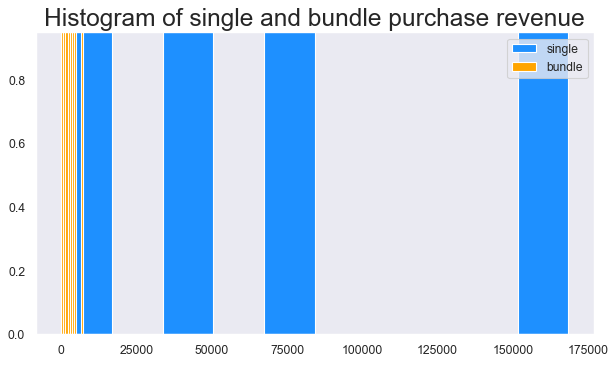

In [223]:
plt.figure(figsize=(9,5), dpi= 80)
plt.hist(ecom.loc[ecom['purchase_type'] == 'single purchase', "revenue"], color="dodgerblue", label="single")
plt.hist(ecom.loc[ecom['purchase_type'] == 'bundle purchase', "revenue"], color="orange", label="bundle")

plt.ylim(0, 0.95)


plt.title('Histogram of single and bundle purchase revenue', fontsize=22)
plt.legend()
plt.show()

<a id='hypothesis'></a>
#### Testing Hypothesis
I'm going to check 2 hypothesis:  
* Average revenue from single purchase and bundle purchase is equal  
* Average revenue from Christmas gifts during particular week is similar both 2018 and 2019 year

NULL hypothesis Hₒ: µ₁ = µ₂ Average revenue from single purchase and bundle purchase is equal   
H₁: Average revenue differs  
alpha = 0.05  
statistical test:  Mann-Whitney

In [224]:
single_data = ecom.query('purchase_type == "single purchase"')
bundle_data = ecom.query('purchase_type == "bundle purchase"')
sample_1 = single_data['revenue']
sample_2 = bundle_data['revenue']
alpha = 0.05
results = st.mannwhitneyu(sample_1, sample_2)
print('p-value: ', results.pvalue)
if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  0.0
We reject the null hypothesis


In [225]:
single_data['revenue'].mean()

423.05703721910123

In [226]:
bundle_data['revenue'].mean()

21.17200689227821

NULL hypothesis Hₒ: µ₁ = µ₂ Average revenue from Christmas gifts during particular week is similar both 2018 and 2019 year  
H₁: Average revenue is different  
alpha = 0.05  
statistical test:  T-Test

In [227]:
christmas_2018 = ecom.query('"2018-11-29" <= invoicedate <= "2018-12-07" & category_group == "christmas gifts"')
christmas_2019 = ecom.query('"2019-11-29" <= invoicedate <= "2019-12-07" & category_group == "christmas gifts"')



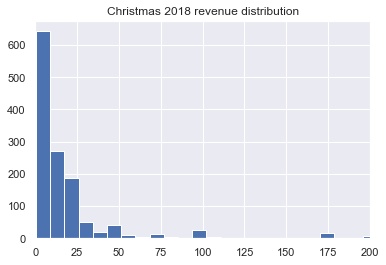

In [228]:
christmas_2018['revenue'].hist(bins=50)
plt.title('Christmas 2018 revenue distribution')
plt.xlim(0, 200)
plt.show()

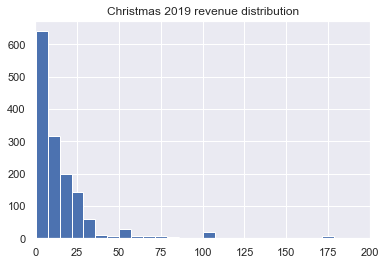

In [229]:
christmas_2019['revenue'].hist(bins=50)
plt.title('Christmas 2019 revenue distribution')
plt.xlim(0, 200)
plt.show()

In [230]:
sample1 = christmas_2018['revenue']
sample2 = christmas_2019['revenue']
alpha = 0.05
results = st.ttest_ind(sample1, sample2)
print('p-value: ', results.pvalue)
if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  0.05700847770740586
We can't reject the null hypothesis


In [231]:
print(christmas_2018['revenue'].mean())
print(christmas_2019['revenue'].mean())

19.25401689708148
17.008892640108105


In [175]:
#ecom.to_csv('ecom2.csv',sep='\t')

<a id='general'></a>
## General conclusion

* There are 3877 unique products in the store, and 4339 different customers. 18536 purchases were made and 397924 items were sold. The average number of items per user is 92 and 4 average orders per customer. Data covers complete equaly periode between 29/11/2018 - 07/12/2019. Can be seen more activity during pre-winter hollydays. 


* DAU is 55, WAU is 300, MAU is 932 - generally, those metrics increase steadily.Also sticky factor expressed as the ratio between the monthly and weekly audience Sticky WAU is 5%, Sticky MAU is 18%. There are average 24.0 orders per customer and 55 customers at average per day.  The highest purchase is 168,470 and average purchase is 22. The highest revenue has been spoted in periode between October - November 2019.  The highest average purchase size at December 2018 justifys purchases before Christmas. The highest LTV is on Nov-Dec 2018, there ia also jump on 3'rd cohort Aug 2019 and retention rate looks steady during the whole (most) periode.  


* We have 15 most trending and profitable products out of 30 most trending and 30 most profitable products when WHITE HANGING HEART T-LIGHT HOLDER,  REGENCY CAKESTAND 3 TIER, JUMBO BAG RED RETROSPOT are the leaders. Winter time is the most profitable periode - 32% of total revenue. By given dates (comparing particular week 29 Nov - 7 Dec) we van compare revenues  (pre-Christmas periode) in 2018 VS 2019. The 2019'th was much more profitable with total revenue of 518,193 VS 2018'th 311,878 respectively.  Most trending and profitable products during winter season are :WHITE HANGING HEART T-LIGHT HOLDER,PAPER CHAIN KIT 50'S CHRISTMAS,REGENCY CAKESTAND 3 TIER. We can say that WHITE HANGING HEART T-LIGHT HOLDER and REGENCY CAKESTAND 3 TIER are annual leaders. Baking accessories, bags and food storage (lunch boxes) are the largest categories (from given categories).  


* Single purchases 6.6% VS bundle purchases 93.4% represent revenue 585,914 VS 8,325,493 respectively. In top 100 trending products 14,731 purchases out of 18,536 purchases (79%), 362 products can be defined as main products.  


* I've tested 2 hypothesis: Average revenue from single purchase and bundle purchase is equal - We reject the null hypothesis, average revenue differs;  Average revenue from Christmas gifts during particular week (29 Nov - 7 Dec) is similar both 2018 and 2019 year - We can't reject the null hypothesis, the average revenue statistical significant in both periodes.  



[Back to top🔝](#up)